<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-mls-project/master/img/GMITLOGO.jpg" width="750"/></p>

# GMIT, H.Dip in Data Analytics, Machine Learning and Statistics Project 2019

## 1. Introduction

This repository contains all of the files pertaining to my 2019 project submission for the Machine Learning and Statistics module of the GMIT H.Dip program in Data Analytics. All of the work contained within this repository was carried out over the course of an 8 week period in October and November 2019. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project Objective 

The objective of the project concerns the well known *Boston House Prices Dataset*. This is a dataset that contains data that was collected by the U.S. census service in the 1970s[2]. The goal of this project is to analyse this dataset in order to demonstrate proficiency and understanding of many statistical and machine learning concepts. The aim is to use some Python[3] packages such as scipy[4], Jupyter, and keras[5] to gain some insight from the data. For the purpose of assessment the project is broken down into 3 sections as follows:

* **Describe:** In this part of the project, the dataset will be imported into this Jupyter notebook and analysed using descriptive statistics and plots.  
* **Infer:** In this part inferential statistics will be used to investigate the effect that proximity to the Charles river has on median house prices.  
* **Predict:** In this part of the project the dataset will be used to train a neural network that can be used for predicting house prices based on the other data in the dataset.   

<p align="center">
  <img src="img/boston-houses.png" width="750"/>
<div align='center' style='font-size:12px'> <b><i>Boston Houses</i></b></div>  
</p>
  

### 1.2 Project Plan

The plan for this project is as follows:

* In Section 2 the dataset will be loaded and analysed using descriptive statistics. The plan will be to look at the relationships between the different data features rather than each data feature on its own. Where there is a strong relationship between features this will be discussed and analysed further.
* In Section 3 the dataset is to be analysed again to see is there is a statistically significant difference between the median house price in areas along the Charles river, versus those which are not. The focus here will be on selecting an appropriate test for significance. 
* In Section 4 a neural network will be trained using the data in the dataset to try and predict a house price based on other inputs. The neural network will then be evaluated for accuracy and then refined to try and improve it. 
* In the Section 5 the project will be concluded and the relative success of the project will be discussed.

## 2. Describe the Boston Housing Dataset

### 2.1 Introduction to the Boston Housing Price Dataset

The Boston Housing dataset was collected by the US census service in the 1970s. It was first published in 1978 by David Harrison and Daniel Rubinfield in their paper *Hedonic Housing Prices and Demand for Clean Air*[6]. In their study they investigated the possibility of using housing data to see if there was a market demand to pay for clean air. By analysing data about the desirability of individual suburbs in the Boston area, they estimated how willing people were to pay for air quality improvements. They found that minor air pollution damages were found to increase with the level of air pollution and levels of household income.

Since its initial publication it has become a useful dataset in the teaching of statistical modeling and machine learning. There are many reasons for this including:
* It is a a manageable size - there are 506 data points in it - each with 14 features (columns of data measurements).
* There are some interesting relationships between the different features which are worthy of analysis and discussion
* It is a good dataset for demonstrating regression and multivariate statistics.
* It is a real dataset representing a real phenomenon and therefore it is quite interesting fro students to analyse.

### 2.2 Loading the Dataset

In this section, the required Python libraries for the project will be imported. These include:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `seaborn`
* `scipy`
*  
*    
Once the libraries are imported, we will the load the dataset using the `sklearn` package. 

#### 2.2.1 Importing the libraries

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

# keras and tensorflow for machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline

#### 2.2.2 Loading the dataset from sklearn

In the next block of code we will load the dataset. Note that `sklearn`[7] is a machine learning package for Python. 
In supervised machine learning it is common to divide the data set into model inputs (data) and model outputs (targets)[8]. As the Boston housing dataset is commonly used for regression problems required to predict housing prices, `sklearn` predefines the house prices feature as a target. We have to add this back into data set.

In [2]:
# load the dataset using the sklearn package - https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_boston
boston_house_prices = load_boston()

# create a dataframe with the data from the dataset
df = pd.DataFrame(boston_house_prices.data, columns=boston_house_prices.feature_names)

# add the median value to the dataframe
df["MEDV"] = boston_house_prices.target

# show the head of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The dataset has 14 different columns of data as can be seen above. We can determine the number of rows using the `shape` function

In [3]:
# check the shape of the dataset
df.shape

(506, 14)

This confirms that the dataset has 506 different data points each with 14 columns of data points. The next step is to try and understand what the different columns such as **CRIM**, **ZN**, **INDUS** etc. mean. Luckily there is a handy function in sklearn for this (DESCR). The output of this function contains much detail on the dataset including the following information on the columns names:

* __CRIM__     per capita crime rate by town
* __ZN__       proportion of residential land zoned for lots over 25,000 sq.ft.
* __INDUS__    proportion of non-retail business acres per town
* __CHAS__     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* __NOX__      nitric oxides concentration (parts per 10 million)
* __RM__       average number of rooms per dwelling
* __AGE__      proportion of owner-occupied units built prior to 1940
* __DIS__      weighted distances to five Boston employment centres
* __RAD__      index of accessibility to radial highways
* __TAX__      full-value property-tax rate per \$10,000
* __PTRATIO__  pupil-teacher ratio by town
* __B__        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* __LSTAT__    % lower status of the population
* __MEDV__     Median value of owner-occupied homes in $1000's

So, it can be seen that the dataset contains a good mix of variables covering socioeconomic factors (such as house prices, property tax rates, pupil teacher ratio in the schools, crime rates) as well as locational factors (such as proximity to Charles river, accessibility to highways) ans environmental factors (such as NOX levels). In the next section we will begin to anaylse the data to see what it tells us.

### 2.3 Analysis of the Dataset 

A good place to start when carrying out exploratory data analysis is to use the pandas `describe()` function to get a feel for the columns in the data set.

In [4]:
# describe the dataset
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The output of this is a grid of data summarising the data and it will be useful to refer back to later. There are many options available to us when it comes to analysing this data - we could plot histograms of every column in the set and discuss each feature in turn, but a much more interesting approach is for us to explore the relationships between the features in the dataset to determine if there is any correlation between them.  

One way looking at the relationships between the data would be to plot scatterplots of some of the features against each other to see if there is any obvious relationship between them. The methodology works like this:
* Choose 2 features that you believe to be related
* Plot them against each other using a scatterplot
* Draw the best fit line
* Calculate the correlation co-efficient to determine how well the best-fit line fits the data
an example of this is shown below:

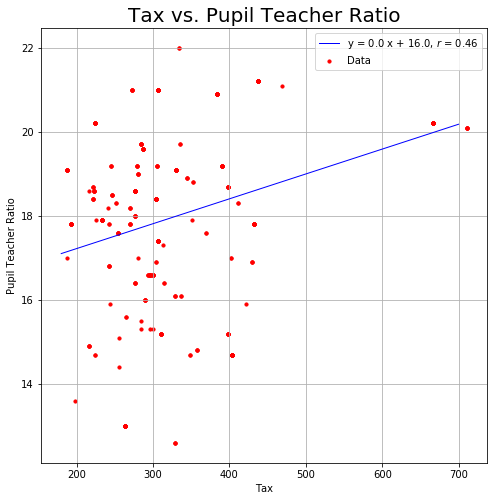

In [5]:
# Resize the plots
plt.rcParams['figure.figsize'] = [8, 8]
# Plot Crime Rate vs. Pupil Teacher Ratio
plt.scatter(df.loc[:, 'TAX'], df.loc[:, 'PTRATIO'],c='red', label='Data', s=10)

# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, 'TAX'], df.loc[:, 'PTRATIO'])
line_x = np.arange(180, 700, 0.1)
line_y = slope*line_x + intercept

# Plot the best fit line
plt.plot(line_x, line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
plt.title("Tax vs. Pupil Teacher Ratio", size="20")
plt.xlabel("Tax")
plt.ylabel("Pupil Teacher Ratio")
plt.legend()
plt.grid(True)
plt.show()

r (the correlation co-efficient or Pearson's co-efficient) can have a value of between -1 an 1, where values close to 0 indicate a poor fit, values close to 1 indicate a good fit and a positive correlation and values close to -1 indicate a good fit and a negative correlation. The correlation co-efficient (r) that we have calculated above is 0.46. This indicates a poor correlation (this can also be seen by the wide scatter of the data points).

The approach of selecting features ans plotting them against one another can work in a situation where are a few features in a set, or when the analyst has a good idea in advance of what variables might be influencing each other. 

For a dataset like the boston housing set, where there are 14 different features, ans the analyst (me!) is not sure of the relationships - we can use a pandas function to create a correlation matrix. This will give us all of the r values for each pair of data points so we can determine which ones merit further analysis.

#### 2.3.1 Creating the Correlation Matrix and Plotting a Heatmap

In this section we will use python to calculate the correlation matrix and visulaise it with a heatmap using the seaborn library. We will then analyse this heatmap to see if it throws up anything interesting.

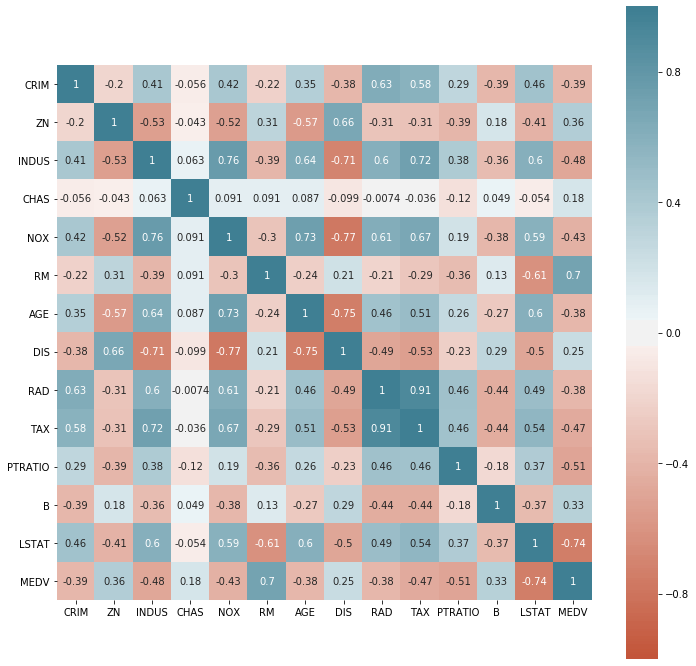

In [6]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [12, 12]

# define the correlation matrix between the data columns in the set
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
corr = df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

#### 2.3.2 Anaylsing the Heat Map

In order to analyse the heat map, we must first determine what a suitable minimum value for r determines a relatively good correlation between a pair of data features. According to the Wikipedia entry for <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson correlation co-efficient</a>[9], several authors have criteria for interpreting this statistic, however most of them are in may ways arbitrary. For example, if somebody was trying to verify <a href="https://en.wikipedia.org/wiki/Ohm%27s_law">Ohm's Law</a>[10] by increasing the voltage in an electrical circuit and measuring the corresponding current. If a scatter plot of this was completed and the correspond r-value calculated, it would be expected (if the electrical components and meters used in the experiment were of high quality) that this r-value would be very close to 1. However, in other field such as social sciences whether is much more noise, and the data generally only give a probability that a relationship between variables is likely, lower values of r are accepted as proof of a good correlation. 

The Boston Housing dataset is very much one from the social sciences. Any relationships between variables are likely to give an impression of the overall trend without being completely precise. For this reason I have chosen to analyse deeper any relationships that have correlation co-efficient of 0.65 or higher (-0.65 or lower for negative correlation!).

A summary of these relationships is listed below:

* The  proportion of residential land zoned for lots over 25,000 sq.ft. is positively correlated with the weighted distances to five Boston employment centres, in other words areas which have larger residential properties are further from the places where most of the jobs are.
* The proportion of non-retail business acres per town is positively correlated to  nitric oxides concentration in the air. This is what would be expected - areas with more industry are likely to burn more fossil fuels.
* The proportion of non-retail business acres per town is also positively correlated to full-value property-tax rate per \$10,000. In other words, areas with more industry tend to have higher property tax returns. Again, this is to be expected.
* The nitric oxide levels are are:
    * Positively correlated to proportion of owner-occupied units built prior to 1940 and full-value property-tax rate per \$10,000
    * Negatively correlated to weighted distances to five Boston employment centers  
    
    This seems to indicate that NOX levels are higher in older areas of the town, where property tax rates are higher
    (more industrial areas), that are shorter distances to the major employment ares. Again this is very much in line
    with what would be expected.
* The average number of rooms per dwelling is positively correlated with the median value of properties in an area. This would be expected - larger properties would be expected to be more expensive.
* The proportion of owner-occupied units built prior to 1940 is negatively correlated to the weighted distances to five Boston employment centers. This means that the older houses are nearer the employment centers (which are the areas with the nigher NOX levels and higher non-retail industry)
* THe index of accessibility to radial highways is positively correlated to the property tax rate. In other words, areas with better transport links (especially for using a private automobile) have higher property tax rates.
* Finally, the % lower status of the population is negatively correlated to the median property value in an area. This seems logical, a higher percentage of poorer people will be able to afford to buy property in areas where the property prices are lower


The initial analysis has given us some ideas to think about. The 2 main areas worthy of deeper analysis are as follows:
* Looking at how the average number of rooms per dwelling and percentage of lower status population are related to the median value of owner-occupied dwellings
* Considering the range of factors that seem to have an impact on NOX levels in the air such as property age, percentage of non-retail industry, distance to employment centers and percentage property tax.

The next analysis will be as follows:
* Create two new pandas dataframes one looking at each relationship
* Plot two new heat maps based on these new data frames
* Create two pair plots using the `seaborn` package to visualise these correlations

We will consider each point in turn

#### 2.3.3 Analysis of the median property value

The first step is to create a new dataframe with just the MEDV, RM and LSTAT columns in it.

In [7]:
# Create a new dataframe
medv_df = df[["MEDV", "RM", "LSTAT"]]
# Check the dataframe to ensure it looks right
medv_df.head()

,MEDV,RM,LSTAT
0,24.0,6.575,4.98
1,21.6,6.421,9.14
2,34.7,7.185,4.03
3,33.4,6.998,2.94
4,36.2,7.147,5.33


Next we will re create the heat map with for `med_df`:

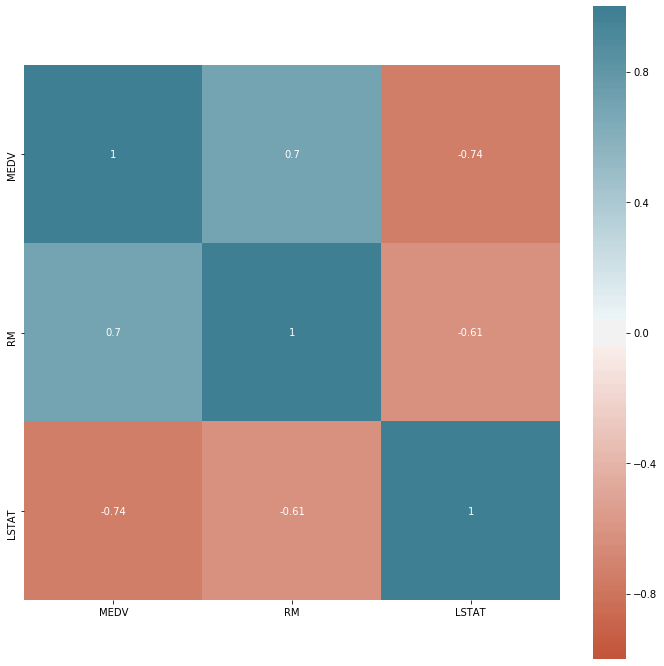

In [8]:
# define the correlation matrix between the data columns in the set
medv_corr = medv_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(medv_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

The next step is produce the pair plot to determine the overall shape of these relationships - i.e. are the relationships linear or perhaps a higher order polynomial might be more appropriate to describe the correlation.

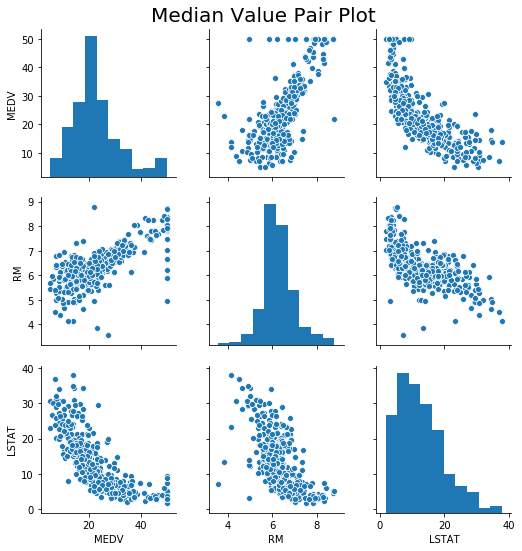

In [9]:
# pair plot to visualise the correlations
medv_pair_plt = sns.pairplot(medv_df)
medv_pair_plt.fig.suptitle("Median Value Pair Plot", size="20", va="bottom")
plt.show()

Analysis of the pair plot:
When analysing a pair plot, I like to start on the diagonal, looking at the distribution of each feature:
* Median values are generally normally distributed - with some outliers for the higher values. The mean is about \$22k and there is a good spread
* Average no of rooms per dwelling is normally distributed with a mean of about 6 (6.28 from section 2.3 above) and not a very big spread (standard deviation is approx 0.7)
* % Lower status population is skewed left, with the most 10-15% being the most frequent (30-40 areas have 10-15% lower status population). There are some areas that have as many as 35% lower status population - though not many, 1 or 2 maximum.

Looking at the relationships between the data:
* Median value seems to be linearly related to the average number of rooms in the dwelling - we can use the `stats.linregress` function to determine the best fit line for this.
* The relationship between median value and \%lower status population is not linear - it is curved. We can use the `numpy.polyfit` function to analyse a quadratic function to see how it fits. 

The next step is to plot these relationships and calculate the best fit lines/curves.

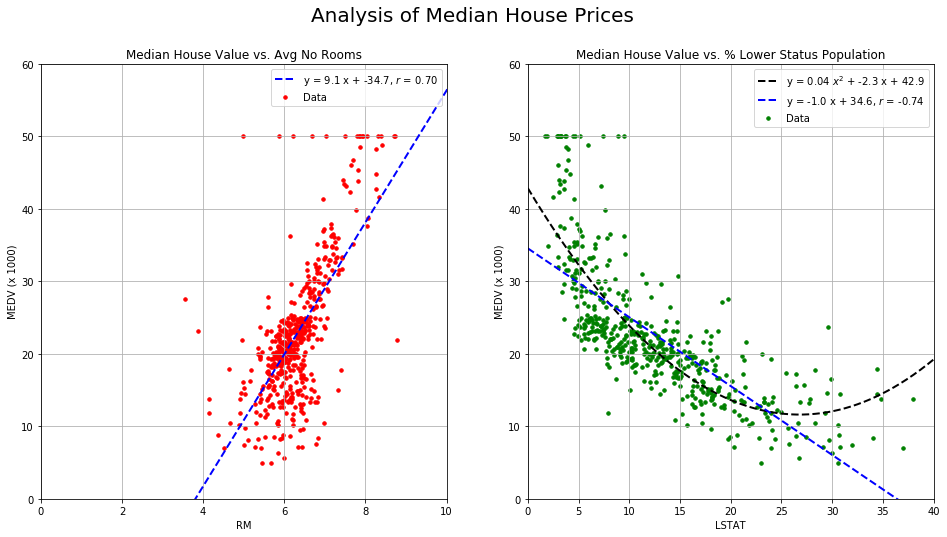

In [10]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [16, 8]

# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2) = plt.subplots(1,2)

# Plot the Median Value against the Average no. of Rooms
ax1.scatter(medv_df.loc[:, 'RM'], medv_df.loc[:, 'MEDV'],c='red', label='Data', s=12)
ax1.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(medv_df.loc[:, 'RM'], medv_df.loc[:, 'MEDV'])
# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_rm = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_rm = slope * x_rm + intercept
ax1.plot(x_rm, y_rm, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
# format the plot
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 60])
ax1.set_xlabel("RM")
ax1.set_ylabel("MEDV (x 1000)")
ax1.set_title('Median House Value vs. Avg No Rooms')
ax1.legend(loc="upper right")

# Plot the Median Value against the % Lower Status Population
ax2.scatter(medv_df.loc[:, 'LSTAT'], medv_df.loc[:, 'MEDV'],c='green', label='Data', s=12)
ax2.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(medv_df.loc[:, 'LSTAT'], medv_df.loc[:, 'MEDV'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly = np.polyfit(medv_df.loc[:,'LSTAT'], medv_df.loc[:,'MEDV'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_lstat = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_lstat = slope * x_lstat + intercept
# Calculate y-values for the quadratic curve
y_poly = poly[0]*(x_lstat**2) + poly[1]*(x_lstat) + poly[2]
plt.plot(x_lstat, y_poly, 'k', linestyle='dashed',linewidth=2, label=r'y = %.2f $x^2$ + %.1f x + %.1f'%(poly[0], poly[1], poly[2])) 

ax2.plot(x_lstat, y_lstat, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
# format the plot
ax2.set_xlabel("LSTAT")
ax2.set_ylabel("MEDV (x 1000)")
ax2.set_xlim([0, 40])
ax2.set_ylim([0, 60])
ax2.set_title('Median House Value vs. % Lower Status Population')
ax2.legend(loc="upper right")

plt.suptitle("Analysis of Median House Prices", size=20)
plt.show()

#### Median House Price Discussion

Even though this dataset was collected in the 1970's with a view to determining whether or not the general population of the Boston area is willing to pay for clean air [6], the dataset is commonly used by data analyst, statisticians and machine learning academics as a means of explaining some of the concepts involved in data analytics. In fact there are myriad blog posts online which use this dataset to illustrate a point - often using it as a way to demonstrate how to determine which relationships are important when training a machine learning algorithm [11], [12], [13], [14].

During the course of analysing the dataset we had determined that the there seemed to be a good linear correlation between house prices and number of rooms - this is intuitive as house with more rooms are likely to be bigger and hence worth more money. We have plotted the best fit line with the data, and this shows that there is a fairly linear relationship between the features as there is an equal spread of data points either side of the line and this condition holds true the entire length of the line. We have also determined the equation of the best fit line as $$ MEDV = 9.1*RM -34.7 $$, and this could be used to help determine the likely price of a house based on the numbers of rooms in it.

We have also considered the relationship between the % lower status population and median house price. The initial analysis hinted at a strong correlation but when it was plotted in the pair plot - it was obvious that the relationship was not linear. This was confirmed when this was plotted with the best fit line. It can be seen that all of the points that are below the line are clustered in the same region between x=5 and x=30. It is clear that a curve might make a better fit and the quadratic relationship between the variables was calculated and plotted. This can be seen to be a much better fit. Again the relationship can be modeled as $$MEDV = 0.04*LSTAT^2 -2.3*LSTAT + 42.9 $$. In the next section features which impact NOX levels will be analaysed.

#### 2.3.4 Analysis of NOX Levels

The first step is to create a new dataframe with the ZN, DIS, INDUS, NOX, TAX, AGE and RAD columns in it.

In [11]:
# Create a new dataframe
nox_df = df[["NOX", "DIS", "INDUS", "TAX", "AGE"]]
# Check the dataframe to ensure it looks right
nox_df.head()

,NOX,DIS,INDUS,TAX,AGE
0,0.538,4.0900,2.31,296.0,65.2
1,0.469,4.9671,7.07,242.0,78.9
2,0.469,4.9671,7.07,242.0,61.1
3,0.458,6.0622,2.18,222.0,45.8
4,0.458,6.0622,2.18,222.0,54.2


Next, we will create a heatmap of `nox_df`:

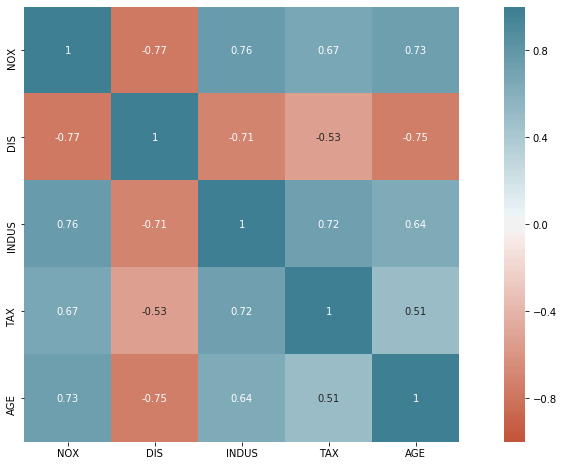

In [12]:
# define the correlation matrix between the data columns in the set
nox_corr = nox_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(nox_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

Finally, we create a pair plot to visualise the relationships.

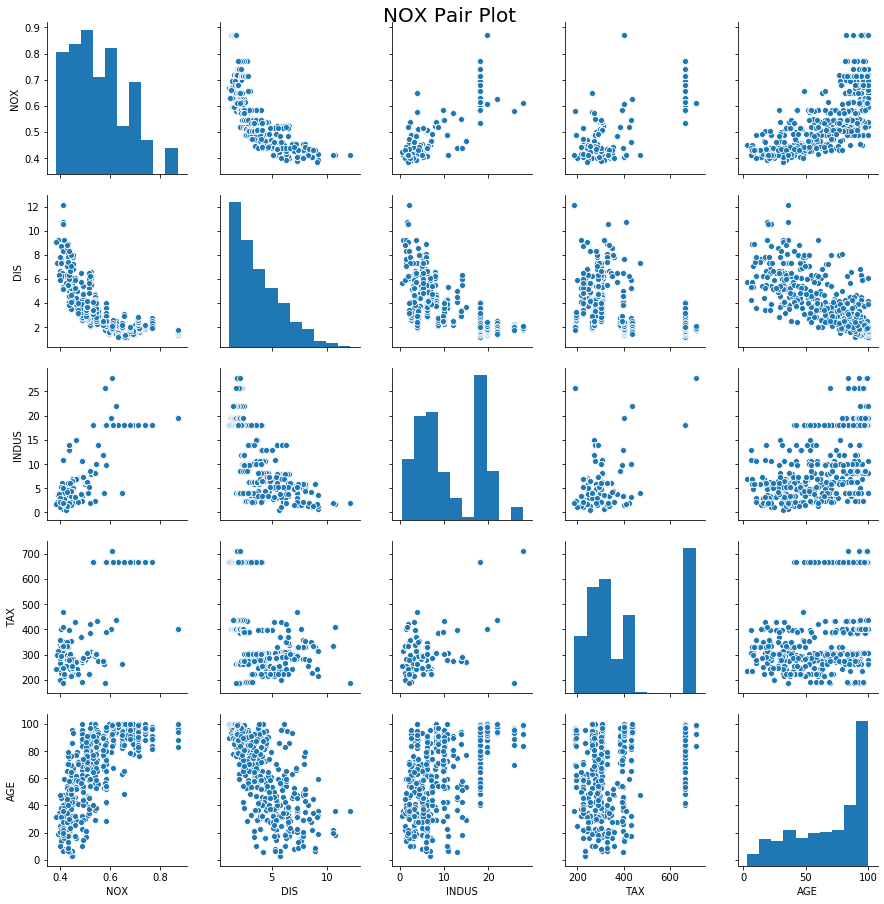

In [13]:
# pair plot to visualise the correlations
nox_pair_plt = sns.pairplot(nox_df)
nox_pair_plt.fig.suptitle("NOX Pair Plot", size="20", va="bottom")
plt.show()

Analysis of the pair plot:
Again starting on the diagonal, looking at the distribution of each feature:
* NOX levels are skewed left - this means that most ares have lower levels of NOX in the air. As we consider higher NOX levels, there are fewer and fewer areas affected.
* The distance the the five employment centers is skewed left - residential properties tend to be near where the jobs are, as you move further away there are less housing areas.
* The distribution of non retail industries is bi-modal with a peak at about 7% and another at about 20%
* The percentage property tax seems to be somewhat normally distributed with some outliers at around 700.
* The proportion of properties built before 1940 of the properties is right skewed - there are more older houses than newer ones. It can be seen that there are a large number of areas that were built entirely before 1940.

Looking at the relationships between the data:
* The first thing to note is that even though some of these pairs of data features have reasonably high r-values - there does not seem to be a good relationship between them. We will only consider the strongly related pairs of data features for further analysis.
* NOX is strongly related to the distance to the five employment centers - the relationship is not linear so we can ue the `numpy.polyfit` function to determine a good model for it.
* The relationship between the NOX levels and the percentage of non retail industry is resonably linear - we can use `stats.liregress` to explore further.
* The relationship between NOX levels and proportion of properties built before 1940 is resonably goods but non-linear. We can explore with `numpy.polyfit`

IN the next part here I need to plot these 3 functions and determine the best line/curve

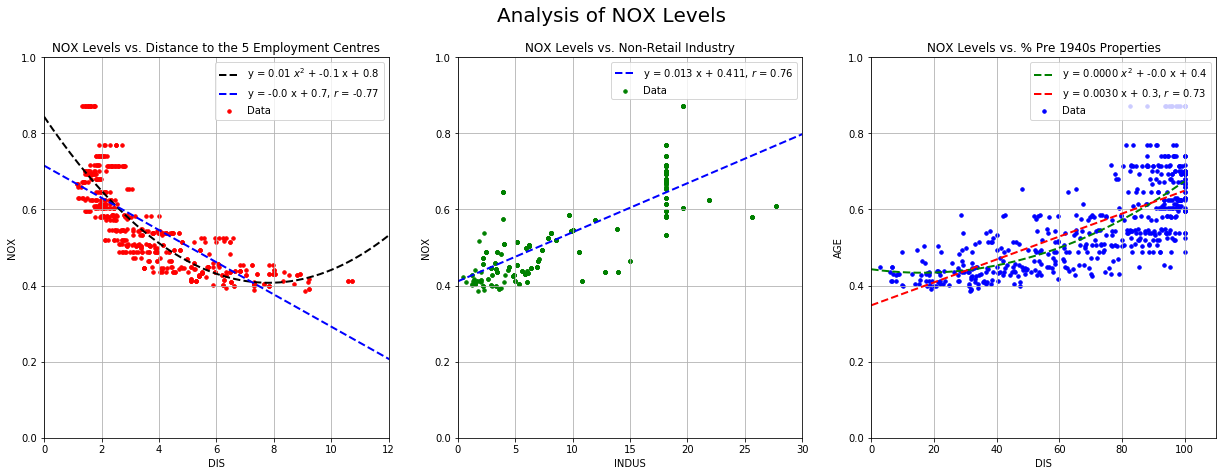

In [14]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [21, 7]

# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2, ax3) = plt.subplots(1,3)

# Plot NOX against DIS
ax1.scatter(nox_df.loc[:, 'DIS'], nox_df.loc[:, 'NOX'],c='red', label='Data', s=12)
ax1.grid(True)
# Calculate the linear statistics using stats.linregress()
dis_slope, dis_intercept, dis_r_value, dis_p_value, dis_std_err = stats.linregress(nox_df.loc[:, 'DIS'], nox_df.loc[:, 'NOX'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly_dis = np.polyfit(nox_df.loc[:,'DIS'], nox_df.loc[:,'NOX'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_dis = np.arange(0,15.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_dis = dis_slope * x_dis + dis_intercept
# Calculate y-values for the quadratic curve
y_dis_poly = poly_dis[0]*(x_dis**2) + poly_dis[1]*(x_dis) + poly_dis[2]

# plot the best fit line and 2nd order polynomial
ax1.plot(x_dis, y_dis_poly, 'k', linestyle='dashed',linewidth=2, label=r'y = %.2f $x^2$ + %.1f x + %.1f'%(poly_dis[0], poly_dis[1], poly_dis[2])) 
ax1.plot(x_dis, y_dis, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(dis_slope, dis_intercept, dis_r_value))
# format the ax1 plot
ax1.set_xlim([0, 12])
ax1.set_ylim([0, 1.0])
ax1.set_xlabel("DIS")
ax1.set_ylabel("NOX")
ax1.set_title('NOX Levels vs. Distance to the 5 Employment Centres')
ax1.legend(loc="upper right")

# Plot the NOX against INDUS
ax2.scatter(nox_df.loc[:, 'INDUS'], nox_df.loc[:, 'NOX'],c='green', label='Data', s=12)
ax2.grid(True)
# Calculate the linear statistics using stats.linregress()
indus_slope, indus_intercept, indus_r_value, indus_p_value, indus_std_err = stats.linregress(nox_df.loc[:, 'INDUS'], nox_df.loc[:, 'NOX'])

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_indus = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_indus = indus_slope * x_indus + indus_intercept

# plot the best fit line
ax2.plot(x_indus, y_indus, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.3f x + %.3f, $r$ = %.2f'%(indus_slope, indus_intercept, indus_r_value))

# format the plot
ax2.set_xlabel("INDUS")
ax2.set_ylabel("NOX")
ax2.set_xlim([0, 30])
ax2.set_ylim([0, 1.0])
ax2.set_title('NOX Levels vs. Non-Retail Industry')
ax2.legend(loc="upper right")

# Plot NOX against AGE
ax3.scatter(nox_df.loc[:, 'AGE'], nox_df.loc[:, 'NOX'],c='blue', label='Data', s=12)
ax3.grid(True)
# Calculate the linear statistics using stats.linregress()
age_slope, age_intercept, age_r_value, age_p_value, age_std_err = stats.linregress(nox_df.loc[:, 'AGE'], nox_df.loc[:, 'NOX'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly_age = np.polyfit(nox_df.loc[:,'AGE'], nox_df.loc[:,'NOX'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_age = np.arange(0,100,0.1)
# Calculate the y values using the slope and intercept calculted
y_age = age_slope * x_age + age_intercept
# Calculate y-values for the quadratic curve
y_age_poly = poly_age[0]*(x_age**2) + poly_age[1]*(x_age) + poly_age[2]

# plot the best fit line and 2nd order polynomial
ax3.plot(x_age, y_age_poly, 'g', linestyle='dashed',linewidth=2, label=r'y = %.4f $x^2$ + %.1f x + %.1f'%(poly_age[0], poly_age[1], poly_age[2])) 
ax3.plot(x_age, y_age, 'r-', linestyle='dashed',linewidth=2, label=r'y = %.4f x + %.1f, $r$ = %.2f'%(age_slope, age_intercept, age_r_value))
# format the ax1 plot
ax3.set_xlim([0, 110])
ax3.set_ylim([0, 1.0])
ax3.set_xlabel("DIS")
ax3.set_ylabel("AGE")
ax3.set_title('NOX Levels vs. % Pre 1940s Properties')
ax3.legend(loc="upper right")

plt.suptitle("Analysis of NOX Levels", size=20)
plt.show()

#### NOX Levels Discussion

The original intent of the surveyors who collected this data was to determine the economic benefits of having clean air [6]. So it is important to consider what kinds of things drive pollution when analysing this data.

Initial analysis of the data set showed us that there seems to be a good, but non-linear negative correlation between NOX levels and the Distance to the 5 main employment centres. This would be what would be expected - areas where people are employed are likely to have more industry in them and therefore there is likely to be more air pollution generated as part of this industrial activity. As part of the analysis we fitted a 2nd order polynomial to try to represent this relationship: $$NOX = 0.01 * DIS^2 -0.1 * DIS + 0.8 $$

This evidence is corroborated by the fact the there is a positive correlation between the amount of non retail industry in a town and the levels of NOX in the ambient air. This relationship seems fairly linear and is approximated as: $$NOX = 0.013 * INDUS + 0.411 $$

The last point to make on this to consider the relationship between NOX levels and the percentage of properties built before which is a positive correlation. I have fitted both a linear and polynomial model to this relationship and it looks to be that there is not mush difference between them over the range of our dataset, this means that the linear model will be sufficient: $$NOX = 0.003 * AGE + 0.3 $$

This would seem to indicate that there are worse NOX levels in areas that have a higher proportion of older houses. So, considering the orignal pupose of this data and analysing what the economic implication of air pollution and whether or not people would be prepared to pat for clean air - we will consider one more set of relationships. In the original heatmap in section 2.3.1 is can be seen that there is a positive correlation of 0.6 between AGE and LSTAT. This means that areas with older houses in thembtend to have higher proportions of poorer people in them.

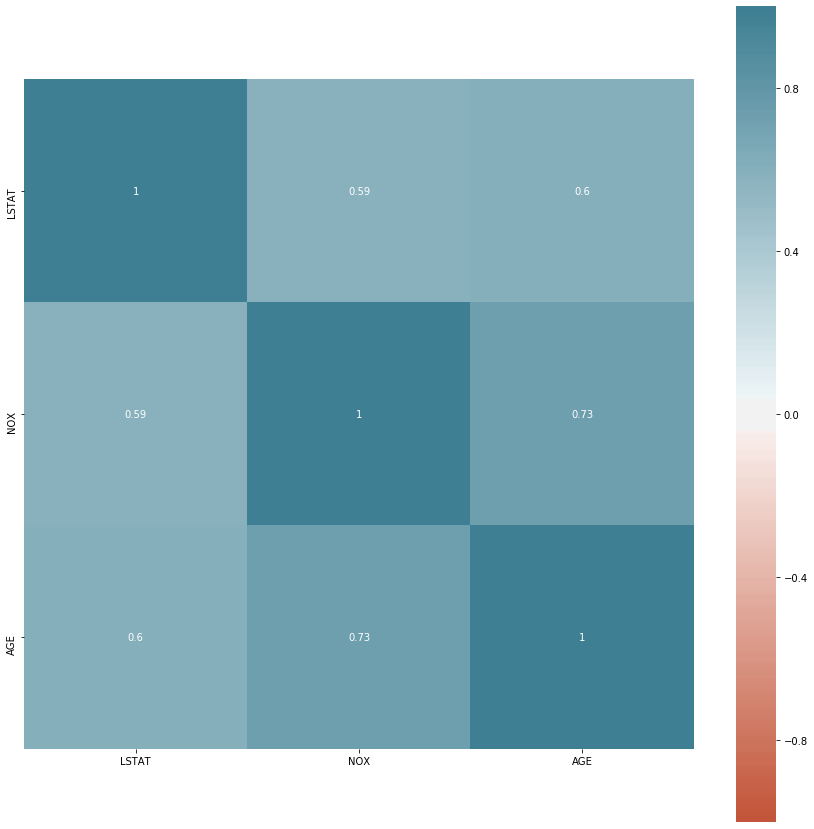

In [15]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# Create a new dataframe
lstat_df = df[["LSTAT", "NOX", "AGE"]]

# define the correlation matrix between the data columns in the set
lstat_corr = lstat_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(lstat_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

Next lets consider the pair plot for this relationship:

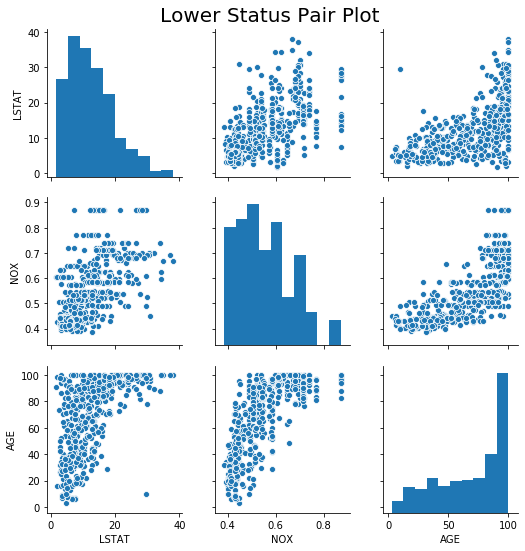

In [16]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# pair plot to visualise the correlations
lstat_pair_plt = sns.pairplot(lstat_df)
lstat_pair_plt.fig.suptitle("Lower Status Pair Plot", size="20", va="bottom")
plt.show()

These plots do show that NOX levels tend to be higher in areas with a higher proportion of lower status people. Therefore there may not be huge willingness for people to pay for air quality improvements - as better off people are more likelt to live in areas with cleaner air, and the poorer people who are more likely to  live in areas with lower quality air are unlikely to be able to pay for these improvements

## 3. Comparing House Prices with Inferential Statistics

In section 2 we used descriptive statistics to describe the relationships between the various features of the Boston housing data set. In this section we are going to use *inferential statistics* to investigate the relationship between the proximity of a house to the Charles river and median value of houses in that area. The plan for this section is as follows:

* Introduce inferential statistics
* Consider the *t-test* with respect to the dataset 
* Select an appropriate *t-test* and carry it out on the data
* Present the results and discuss the findings

#### 3.1 Introduction to Inferential Statistics

Inferential statistics allow us to make prediction or inferences from a set of sample data [15]. When using inferential statistics, an analyst will take samples of data and analyse these in order to make generalisations about the entire population. This is often done because it is infeasible, impractical or impossible to analyse the entire population. One case where inferential statistics are used heavily is in political opinion polls. When carrying these polls it is not possible to ask everybody in the entire country their opinion on a particular matter, instead the researchers will choose a representative sample of the population and survey that. They will then analyse the results of from this surveyed sample and make inferences about the entire population from this. There are two main areas of inferential statistics, these are:

1. Estimation (of a population statistic based on a sample statistic)
1. Hypothesis Testing (comparing the means of two related groups of data)

#### 3.1.1 Estimation [16]

Take the case where a researched wants to determine what proportion of children aged 8 to 10 like football. What tey could do is design a survey where they take a sample of 1000 children and survey them. A properly designed survey will ensure that the sample includes a proportional amount of children based on gender, whether they are urban or rural, economic background etc. However, no matter how well the sample is chosen the researcher must remember that it is still just a sample of the population - and that these samples can vary. I other words if the survey was repeated using the same proportions of boys/girls, urban/rural but using different children he results are likely to vary from survey to survey. In order to build confidence in the research, a *margin of error (MOE)* should be included with all inferential estimation statistics. The MOE measures how close the sample statistic is likely to be to the population parameter that is being studied. The MOE is calculated to a confidence interval decided by the researcher. If the survey in question was to be carried out a large number of times, most times the sample mean will be close to the population mean, but these survey means will be distributed and there is always a small chance that some surveys will show very high proportions of children age 8 to 10 that like football, (or very low proportions). 

The process the researcher will follow is this:

* Calculate the sample mean (say 60%) - this says 60% of children aged 8 to 10 like football
* Decide on a confidence interval for the margin of error (i.e. what percentage of samples are likely to fall within the margin or error - say 95%)
* Use a Standard Normal Distribution (Normal Distribution with mean = 0 and standard deviation = 1), to determine a z value at 95% (this is 1.96)
* Calculate the margin of error as follows:
$$ MOE = z * \sqrt{\dfrac{p(1-p)}{n}}$$

Where:
* z is determined from the table
* n is the sample size
* p is the sample proportion (60% in the example above)

We can calculate the MOE using python.

In [17]:
# define the variables
n = 1000
p = 0.60
z = 1.96
# calculate the MOE
MOE = (z * (p*(1-p)/n)**0.5)

print("The % margin of error for this study is:", round(MOE*100,2), "%")

The % margin of error for this study is: 3.04 %


So the researcher could conclude that the percentage of all children aged 8 to 10 that like football is 60% with a margin of error of 3% at a 95% confidence interval. What this means is that is 1000 children aged 8 to 10 were polled as to whether or not they like football, the result would lie between 57% and 63% 95% of the time.

#### 3.1.2 Hypothesis Testing

When carrying out a comparison study is not possible, or feasible to compare every subject that is to be studied. Instead we must collect a sample dataset and analyse that. From this we can make inferences about the population. An everyday application of this is in clinical trials for new medicines. If a pharmaceutical company wants to compare the performance of a new blood pressure medication to see if it provides better outcomes for patients than the current medication available it might carry out a trial as follows:
1. Select a 2000 people with high blood pressure
1. Measure their blood pressure before the trial
1. Give 1000 the current medication for 6 months
1. Give 1000 the new medication for 6 months
1. Measure their blood pressure again after 6 months and calculate the delta (difference between start and end blood pressure)
1. Calculate the average delta for the group on the old medication
1. Calculate the mean delta for the group on the new medication
1. Compare them to see if the the new medication has a higher delta than the old one (and hence is it more effective)

An issue with this method is that we have only considered a sample of the entire population. It is possible that if we repeated the test numerous times with different test subjects we would get many different outcomes and the actual mean deltas in blood pressure would be distributed. In order to determine the statistical significance of the findings of the study a *t-test* is carried out.

The steps for carrying out a t-test are as follows [17]:

1. State the hypothesis
1. Formulate an analysis plan
1. Analyse sample data
1. Interpret the results

**State the Hypothesis**

Every t-test requires the analyst to state the *null hypothesis* and the *alternative hypothesis* prior to carrying out the analysis. These are stated in such a way as that only one of them can the true and the other must be false. In the blood pressure example discussed above the null hypothesis would state there there is no difference between the means, meaning that the alternative hypothesis is there is a difference between the means. Or formally:
$$H_0: \mu_1 = \mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

**Formulate an analysis plan**

The analysis plan should state the following:
* The significance level - this is similar to the confidence level in estimation. We must declare what is acceptable. 95% is usually used - it means that if the same test was carried out 100 times using different samples we would expec to see the observed results 95% of the time.

* The test method. There are many different t-test methods such as independant test, paired tests, Welch tests etc. All of these are appropriate in different situations and this must be decided upon based on the data that has been collected.

**Analyse sample data**

A number of statistics need to be calculated on the dataset, note that the calculations shown below are for a independant 2 sample t-test.

*Standard Error, SE*

$$ SE = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$

Where $s_1$ is the standard deviation of sample 1, $s_2$ is the standard deviation of sample 2, $n_1$ is the number of items in sample 1 and $n_2$ is the number of items in sample 2.

*Degrees of Freedom , DF*

$$ DF = \dfrac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{(\frac{\frac{s_1^2}{n_1}}{n_1-1})+(\frac{\frac{s_2^2}{n_2}}{n_2-1})}$$

note that the degrees of freedom is related to the sample size. This is used because the t-distribution is not one distribution but rather a family of distributions. Larger sample sizes with more degrees of freedom result is leaner distributions. When sample sizes are smaller the t-distribution is more spread out p making it more difficult to discern statistical significance as a higher percentage of possible outcomes will be in areas past the critical values. 

<p align="center">
  <img src="img/tdist.jpg" width="500"/></p>
  
*Test Statistic, t*

$$t = \dfrac{\overline{x_1}-\overline{x_2}}{SE}$$

Where $\overline{x_1}$ is the mean of sample 1, and $\overline{x_2}$ is the mean of sample 2. Note for simplicity I have kept this definition to th case where we comparing whether 2 means are equal or not. 

*p Value, p*
This is the probability of observing an outcome as extreme as the test statistic. This was traditionally looked up in tables based on the significance level for the test and the degrees of freedom in the data. There are packages in python such as `scipy.stats` that will calculate the t stat ad corresponding p value for us.


**Interpret the results**

When the sample findings are unlikely the null hypothesis is rejected. This is usually done by comping the p value to the significance level. If the p value is less than the significance the level the null hypothesis is rejected in favour of the alternative hypothesis. In other words if a significance level of 0.95 is selected it means that we would expect to see similar results 95% of the time with different samples. If the p value (probability of of observing the outcome by chance) is less than 0.05 it means that the results are statistically significant or that the feature that is being observed is having a greater impact on the outcome than change alone.

### 3.2 Hypothesis testing and the Boston Housing Dataset

One of the objectives of this projects is to use inferential statistics to determine whether or not there is a significant difference in house prices between house that are located along the Charles river and those that aren't. This will be done using the methodology described in Section 3.1.2.

#### 3.2.1 State the Hypothesis

For this analysis the null hypothesis will be that there is no difference between the median values of house located near the Charles river (call this $\mu_c$)and the median values of houses that are not located along the Charles  river (call this $\mu_n$). Or more formally:

$$H_0: \mu_c = \mu_n$$
$$H_a: \mu_c \neq \mu_n$$


#### 3.2.2. Formulate an Analysis Plan

For this analysis a significance level of 0.95 will be chosen. We will accept the result as statistically significant id the calculated p-value for the test is below 0.05. In addition to this we need to select an appropriate t-test procedure for our data. As the data is independant (houses along the Charles river are not related to the houses that are not along the river) we must use an independant test. Also as we have defined the null hypothesis as $H_0: \mu_c = \mu_n$ and the alternative hypothesis as $H_a: \mu_c \neq \mu_n$ we must use a 2-tailed test as the alternative hypothesis covers both cases where $\mu_c > \mu_n$ and $\mu_c < \mu_n$. 

First we will consider the independant 2-tailed test which is appropriate when the following conditions are met:

1. The sampling method for each sample is simple random sampling.
1. The samples are independent.
1. Each population is at least 20 times larger than its respective sample.
1. The sampling distribution is approximately normal, which is generally the case if any of the following conditions apply.
    * The population distribution is normal.
    * The population data are symmetric, unimodal, without outliers, and the sample size is 15 or less.
    * The population data are slightly skewed, unimodal, without outliers, and the sample size is 16 to 40.
    * The sample size is greater than 40, without outliers.
    
Assumptions 1,2 and 3 hold true as the data was randomly collected, the samples are independant and the population (number of houses in the Boston area) would more than 20 times larger that the 500 data points in the set. We need to consider point - particularly the last point as we have more than 40 data points. We need to check the dataset for the presence of outliers. The simplest way to do this is to plot a box plot.    

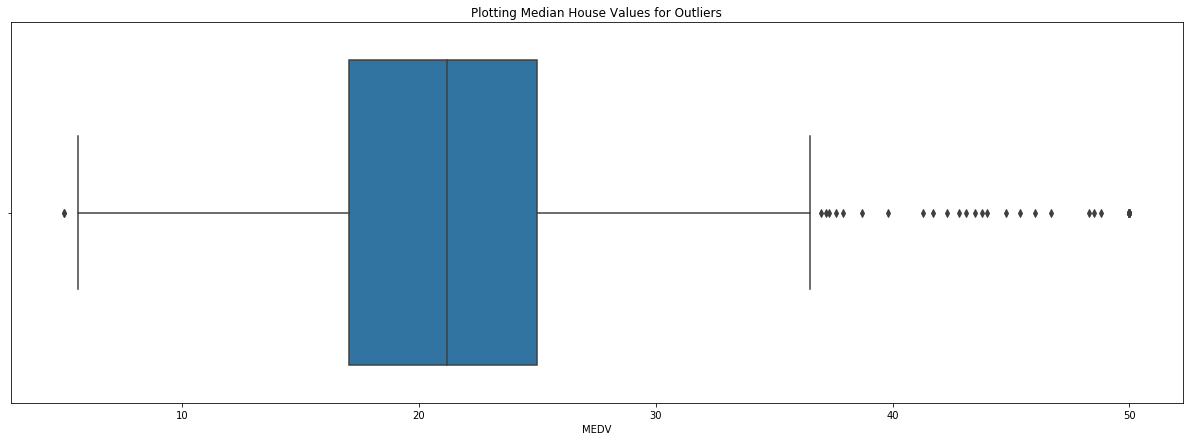

In [18]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [21, 7]

ax = sns.boxplot(x=df["MEDV"]).set_title('Plotting Median House Values for Outliers')

The boxplot shows that there are a significant number of outliers at the upper end of the data set and a smaller number at the lower end. This means that the assumptions for a t-test are violated. In this case we can do one of the following things [18]:

* Check the data – in particular, make sure that that the problematic data are true outliers and not errors in copying
* Ignore the problem – not recommended since this will often yield inaccurate results, although often acceptable if the violation of the assumptions is not too severe
* Perform one of the modified t tests (e.g. Trimmed Means Test or Yuen-Welch’s Test)
* Transform the variable, the Box-Cox transformation can be especially useful
* Use a non-parametric test

Having carried out some internet research I have concluded that non-parametric test are easier to apply since fewer assumptions need to be applied [19]. This research has also led me to the Wilcoxon Rank Sum test for independant samples [20][21], which can be applied rovided the two independent samples are drawn from populations with an ordinal distribution. One of the caveats to using this test is that we have to modify our null and alternative hypotheses slightly to fit this test. Rather that using "the means are equal" for our null hypothesis we instead claim it as follows:

$H_0$: the observations come from the same population

Meaning the alternative hypothesis is:

$H_a$: the observations do not come from the same population

Its a small detail but its worth noting.

#### 3.2.3 Analyse Sample Data

The first step we must carry out is to see if our sample data shows a difference in median house values depending on proximity to the river. 

In [19]:
# split the data in 2 2 dataframes depending on location
df_near_chas = df[df["CHAS"]==1]
df_not_chas = df[df["CHAS"]==0]
# print the mean of the median values depending location
print("The mean of the median values of houses near the Charles river is: ",round(df_near_chas["MEDV"].mean(),2),"thousand dollars")
print("The mean of the median values of houses not near the Charles river is: ",round(df_not_chas["MEDV"].mean(),2),"thousand dollars")
print("The percentage difference is :",
      (df_near_chas["MEDV"].mean()-df_not_chas["MEDV"].mean()/df_not_chas["MEDV"].mean()),"%")

The mean of the median values of houses near the Charles river is:  28.44 thousand dollars
The mean of the median values of houses not near the Charles river is:  22.09 thousand dollars
The percentage difference is : 27.44 %


Our sample data is telling us that median value of houses near the river are 6 thousand dollars higher than those not on the river. This would mean that houses near the river have a median value that is 27% higher than those not on the river.

The next step is to visualise the data to see if this difference is obvious graphically. Note that as there are many more data points not near the Charles river, I am plotting the densities so that the data is easier to compare.

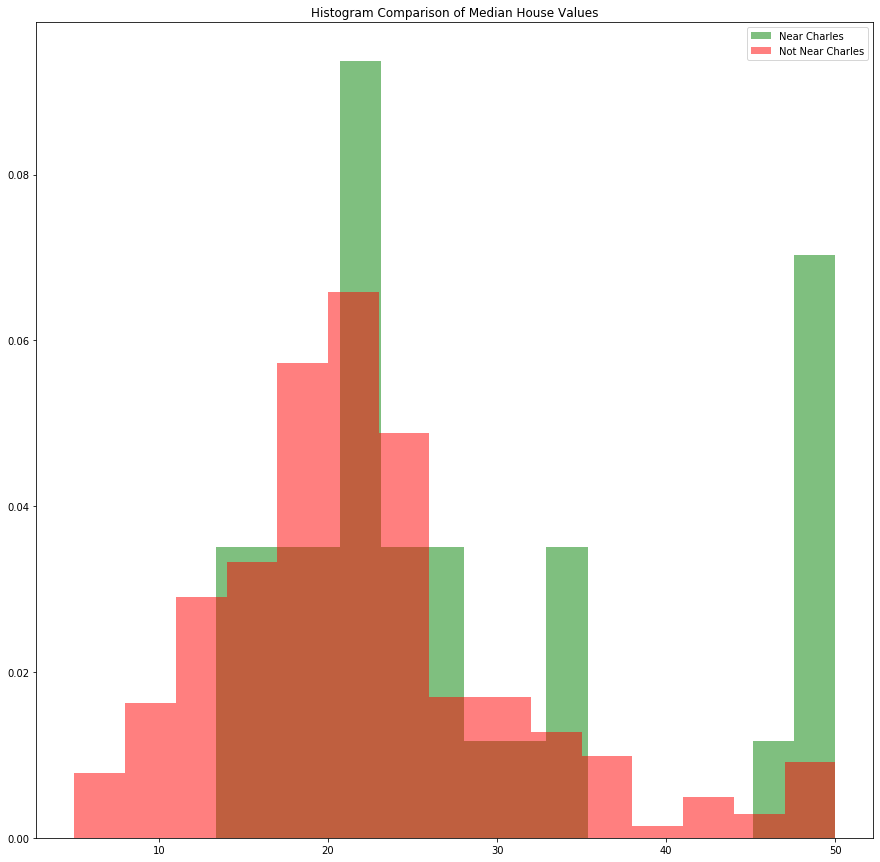

In [20]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# plot the histograms
plt.hist(df_near_chas["MEDV"], bins=15, color="green", alpha=0.5, density=True, label="Near Charles")
plt.hist(df_not_chas["MEDV"], bins=15, color="red", alpha=0.5, density=True, label="Not Near Charles")
plt.title("Histogram Comparison of Median House Values")
plt.legend()
plt.show()

The first thing that jumps put from this chart is that in general house values of houses not along the river are normally distributed around the calculate mean of about 22 thousand. The values of houses that are not along the river are a bit different - in general they follow a similar patter to those not along the river, but the mean is being inflated by a higher proportion of data points that have much higher house values. So our hypothesis test should tell us how statistically significant the impact of these higher valued houses are on the whole.

In [21]:
# use scipy to calculate the t-stat and p-value of the Wilcoxon Rank Sum test
stats.ranksums(df_not_chas["MEDV"], df_near_chas["MEDV"])

RanksumsResult(statistic=-3.1597469070918573, pvalue=0.0015790624227478714)

#### 3.2.4 Interpret Results

Based on the analysis of the data we can conclude the following:
* Median house values along the river are approx 6,000 dollars (or 27%) more higher than those that are not along the river.
* Since the p-value (0.0015) is less that the significance level (0.05) we cannot accept the null hypothesis that the samples were drawn from the sample population.
* Therefore the differences are statistically significant.

Something that is worthy of further discussion is the impact of the outliers on the significance. As part of the experimental design it was determined that the sampled data did not meet the condition of being normally distributed (without outliers). One of the suggested options I came across in my research was to ignore it (but it wasn't highly recommended). Had I ignored it I could have used the standard independant t-test for statistical significance. The results of which would have been as follows:

In [22]:
# use scipy to calculate the t-stat and p-value of the independant t-test
stats.ttest_ind(df_not_chas["MEDV"], df_near_chas["MEDV"])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Note that in this case the p value is significantly lower - 2 orders of magnitude lower in fact. By simply ignoring the fact that the data had outliers it could easily allow somebody to reject a null hypothesis incorrectly. This highlight the importance of checking the assumptions and then selecting an approriate test based on the sampled data.

## 4. Predicting Boston House Prices with Keras

<img src="img/keras.png" width="700"></img>

In this section we will use the machine learning package Keras and the Boston Housing dataset to create and train a neural network that will allows us to predict house prices based on the other features in the dataset. The plan for this section is as follows:

* General introduction to machine learning
* Introduction to neural networks
* Description of Keras and Tensorflow
* Create the machine learning model for making predictions
* Evaluate the model and discuss

### 4.1 Introduction to Machine Learning

The term *Machine Learning* was first coined in the 1950's by a prominent computer games pioneer named Arthur Samuel[23][25]. He defined it as the ability of computers to learn without being explicitly programmed. This definition was refined and formalised in 1997 by Tom Mitchell when he stated that *"A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."*

<img src="img/machine.jpg" width="700"></img>

In recent years the term has become more commonplace as it is a fast growing subfield of computer science. If we are to consider how a machine might learn (or get better at some task with experience), it useful to think of how humans learn. Consider a person throwing a dart at a dartboard aiming for the bullseye. After 1 or 2 throws the might realise that they are throwing to too low, so they adjust the throwing angle. This may lead to the dart landing too high so the adjust the power used in the throw. Gradually and iteratively as the human gets more experience of the task they will get better at it. They are learning.

In the field of data analytics machine learning is used to create complex algorithms to analyse datasets that can then be used to make predictions. In fact the aim of this section of the project is to do just that! 

Depending on the problem to be solved, there are many different approaches to machine learning such as[24]:
* Supervised Learning
* Unsupervised Learning

In supervised learning, the algorithm is trained with data for which the model inputs are labelled with the deisred outputs by a human. An algorithm such as this will compare the actual outputs with the predicted outputs and improve the model. A common use case for this would be handwriting recognition, where a model could be trained on a set of data what typical letters look like so that when fed an unknown letter in the future it can predict what letter it is most likely to be. Supervised learning techniques are used to anaylse historic data with a view to predicting statistically likely future behaviour. We will use a supervised learning technique in this project to predict median house prices in the Boston area, based on the historical data that we have in the dataset.

In unsupervised learning, data is unlabelled. This means that the algorithm must determine the relationships between the input data. This is particularly useful in situations where the 'labelling' of data is unknown or unknowable. An example of where this might be used is in targeted marketing. By collecting large sets of data on customers and their purchases, it might be possible for an algorithm to detect whether a person is likely to enjoy a particular pastime and then direct targeted marketing based on this towards them.

Two of the most common supervised machine learning tasks are:

1. Regression - this is a supervised learning technique that is used when the outputs are numerical and continuous. We will used a regression technique when analysing the Boston data set.

1. Classification - this is used when inputs are divided into 2 more classes for outputs. Handwriting recognition is an example of this.

Machine learning algorithms make use of Neural Networks in order to learn from the data. These will be explained in the next section.

### 4.2 Introduction to Neural Networks

#### 4.2.1 Neurons

A neural network was defined as *a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs*, [26] by Dr. Robert Hecht-Nielsen, the inventor of one of the first neuro-computers. It is inspired by the way biological neurons in the human brain process information.

The basic unit of computation in a neural network in a neuron. A neuron receives information from an external source (or other neurons in the network) in the form of inputs. These inputs all have a weighting to determine there importance compared to other inputs. Each neuron also has a constant bias which is used to help refine the model, allowing the fit of the model to be improved [27].

The basic idea is that the weights are learnable and that they control the influence of of one neuron on another. Finally an activation function is applies to the output of the neuron. If we do not apply a Activation function then the output signal would simply be a simple linear function. Linear functions are limited their complexity and have less power to learn complex functional mappings from data. A Neural Network without an activation function would simply be a linear regression Model, which has limited power [28]. In short, when we train a neural network we want the neurons to fire whenever they learn specific patterns from the data, and we model the fire rate using an activation function [26]. 

A simple schematic of a 2-input neurons is shown below:

<img src="img/neuron schematic.png"></img>

As a demonstration, lets assume that $w_1$ has the value of 0 and $w_2$ has the value of 1. Lets also assume that the bias, b, is 4. For this example lets use [2,3] as the values for $x_1$ and $x_2$.Finally lets use the <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid function</a> [29] as the activation function. The sigmoid function is commonly used for this purpose as it always returns values between 0 and 1. Is is defined as:
$$S(x) = \dfrac{e^x}{1 + e^x}$$
Using this data we can model the output of this neuron using Python:

In [23]:
# Define the sigmoid activation function
def sigmoid(x):
    e = math.e
    return (e**x/(1 + e**x))
# define the numpy arrays for the inputs and weight
inputs = np.array([2,3])
weights = np.array([0,1])
bias = 4

# get the dot product of the weights and inputs and add the bias
sum_in = np.dot(inputs, weights) + bias

#apply the activation function to get the output
output = sigmoid(sum_in)
print("The output from our simple 2-input neuron is ", round(output,3))   

The output from our simple 2-input neuron is  0.999


This demonstrates that individual neurons are quite simple. The complexity of the model lies the networking of these neurons.

#### 4.2.2 Neural Networks

A neural network is nothing more than a group of neurons connect together. Consider the following:

<img src="img/simple network.png" width=700></img>

The simple network above has:
1. An input layer with 2 inputs $x_1$ and $x_2$
1. A hidden layer with 2 neurons $h_1$ and $h_2$
1. A output layer $O_1$

Consider the case where where all neurons have the same weights, [0,1] as before, and bias ,0 to keep the maths simple. Again we'll use the sigmoid activation function on the output of all neurons. Assuming the same inputs as before ($x_1$ = 2, $x_2$ = 3). We can calculate the value output from the network as follows.

In [24]:
# define the inputs
inputs = [2,3]
weights = [0,1]
bias = 0
# calculate output from h1
h1_sum_in = np.dot(inputs, weights) + bias
h1 = sigmoid(h1_sum_in)

# calculate the output from h2
h2_sum_in = np.dot(inputs, weights) + bias
h2 = sigmoid(h2_sum_in)

# set these outputs as the inputs to the output neuron
o1_inputs = [h1,h2]

# calculate the output, o1
o1_sum_in = np.dot(o1_inputs, weights) + bias
o1 = sigmoid(o1_sum_in)

# print the output
print("The output from our simple 2-input neural network is ", round(o1,3))   

The output from our simple 2-input neural network is  0.722


That demonstrates how individual neurons can be connected into a network, and how the calculations are carried out through the network. Note the following:
1. Input Layer: There is no computation done on the input layer. These values are passed into the next layer for computation
1. Hidden Layer: The computation and processing is carried out in the hidden layers and the output from these are carried forward to the next layers.
1. Output Layer: It is possible to have multiple output nodes in this layer, if we are trying to predict more than one output based on the input data.
1. Connections: As demonstrated, the network consists on weighted connections between the neurons.
1. Activation Function: This defines the output of a neuron for a given set of inputs. 
1. Learning rule: This is an algorithm that modified the parameters (weight and biases) of the model to produce a favoured output for a given set of inputs.

#### 4.2.3 Training the Neural Network

For this project, the plan will be to use the Python packages Tensorflow and Keras to model a neural network and then train it using the Boston Housing Dataset, so that this network could then be used for predicting house prices of other houses. The process of training the network can be quite tricky and is very much one of trial and error. A good approach to training such a network would be as follows:
1. Decide what features of the dataset might make good indicators to be used for estimating house prices.
1. Create a model using the Keras package
1. Define how many layers you want in the model and how many neurons to use in each layer. Note that this can be picked arbitrarily first and refined later.
1. Decide on the activation function for each layer. Again this can be chosen by trial and error as the model is refined.
1. Define 1 neuron in the output layer representing the house prices.
1. Decide on the optimser [30]. This is the process that the algorithm uses to iteratively improve the biases and weights. Common optimisers are 'Adam' and 'Stochastic Gradient Descent'.
1. Decide on the loss function. We will used mean squared error for this. Training the neural network is iterative. We show it some outputs for a given set of inputs. It will select weights and biases for each neuron in the network and calculate the outputs. It will compare the calculated output to the actual output. The loss function is a measure of the difference between these values. The same inputs will be shown to the network again, the biases and weights will be modified to try and improve the difference between the actual outputs and calculated outputs. This will be repeated as many times are requested (defined as EPOCHS), each time trying to reduce this loss. The closer to zero the loss is, the better the model will be at predicting house prices based on the inputs. Mean squared error is calculated by taking the difference between each actual output value and predicted output value, squaring it, summing them up and dividing by the number of data points [31]:

$$MSE =  \frac{1}{n} \sum_{n=1}^{n} (Y_i-\hat{Y_i})^2$$

This will allow us to build the model in Keras. The next step is to train the model with the data in the dataset. To help evaluate the dataset it is good practice to keep some of the data back. For this project we will allocate 20% of the data points in the boston housing dataset for testing. The model will be trainined using the other 80%. This will allow us to show the model the testing data (which it hasn't seen before) and ask it to predict the house proves based on this. We can then plot a scatter plot between the actual outputs and predicted outputs to determine how accurate our predictions are.

### 4.3 Creating a Neural Network with the Boston Housing Data  

In this section we will create the model use for making the predictions. Initially we will use the full dataset for this purpose. We will evaluate it's performance at making predictions and see what modifications might be appropriate. The model will be used to try and predict housing prices which are a continuous variable. For this reason this is can be modeled as a regression problem, so I have followed a regression tutorial from the Tensorflow documentation while creating this model [22]. 

The process for creating the model is as follows:

1. Import the dataset (this is complete in section 1 above)
1. Inspect the dataset
1. Clean the dataset if necessary
1. Split the dataset into testing and training data
1. Split the features from the targets (or inputs from outputs)
1. Normalise the data
1. Build the model
1. Train the model
1. Test and evaluate 
1. Modify the model if required and re-evaluate

#### Inspect the dataset and clean it
In this section we will take a look at the dataset to see what kinds of data is in the dataset.

In [25]:
# take a 5 random point from the set
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0
99,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19,33.2
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14,13.1
196,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08,33.3


The dataset contains all numerical fields. This means that there is no requirement to transform any categorical fields to numerical fields. Next we need to determine if there is any missing data.

In [26]:
# check for missing data values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing data points in the dataset. 

#### Split the data set into training and testing data.
In order to evaluate the performance of the model, we need to be able to feed data to it that is hasn't seen before and then compare the actual values of the output to the predicted values. For this model I will use 80% of the data in the data set to train the model leaving me 20% of the data points to test it.

In [27]:
# select 80% of the dataset at random
train_dataset = df.sample(frac=0.8,random_state=0)
# create a test dataset by removing the training data from it
test_dataset = df.drop(train_dataset.index)

# check that the data is split correctly
print("There are %d data points in the entire set" % df["CRIM"].count())
print("There are %d data points in the training set" % train_dataset["CRIM"].count())
print("There are %d data points in the test set" % test_dataset["CRIM"].count())

There are 506 data points in the entire set
There are 405 data points in the training set
There are 101 data points in the test set


As the entire dataset as 506 data points, the training set has 405 points and the test set has 101 points, it looks like the dataset has been split correctly with 80% of the data points going into the training set.

#### Split the features from the targets
In the next step we will separate the features from the targets. Features will act as inputs to the models these are the things that are used to help predict the targets. The targets are the outputs of the model, i.e. the things we are trying to predict. For this exercise we are trying to predict the median house value (MEDV), so we will separate it from the main training and test datasets using the `pandas` `pop` function.

In [28]:
# pop the median values to new datasets
train_targets = train_dataset.pop('MEDV')
test_targets = test_dataset.pop('MEDV')

So at this stage we have inspected the dataset to see if it required cleaning, and then split the dataset into 4 smaller datasets training features, training targets, testing features and testing targets.

#### Normalising the data

It is good practice to normalise data that use different ranges and scales. This makes it easier to train the dataset. The datasets are normalised by subtracting the mean of the training dataset and dividing by the mean. This will distribute the data with a mean of 0 and a standard deviation of 1. Otherwise there is a risk that features that are on a different scale might be more influential in the model. Note that we calculate these statistics from the training dataset but also use them to normalise the test dataset too. This is done to project the test dataset around the same distribution as the training dataset.

The first step is to determine the mean and standard deviation for each feature in the dataset. This is done using the `pandas` `describe` function. We then transpose them. 

In [29]:
# create the training stats for the normalisation 
# this allows up to find means and standard deviattions of each feature
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# create a normaliser function
def norm(x):
  return ((x - train_stats["mean"])/ train_stats["std"])

# normalise the 2 input datasets
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#### Build Model

Note that the code for this was adapted from the Tensorflow regression tutorial. In the tutorial they define a function that is used to build the model. I have decided to start with the same size and shape of neural network as defined in the tutorial. I have change the activation functions to the sigmoid function. I am using 'Adam' as the optimser and using mean squared error as the loss function.

In [30]:
 # a function for building sequential models
def build_model(neurons_per_layer, activation_function, hidden_layers, dataset):
    # this will be a sequential model - with layers added one at a time  
    model = keras.models.Sequential()
    # add the first hidden layer and define the input shape
    model.add(keras.layers.Dense(neurons_per_layer, activation=activation_function, input_shape=[len(dataset.keys())]))
    for i in range(hidden_layers - 1):
        model.add(keras.layers.Dense(neurons_per_layer, activation=activation_function))# define the one neuron in the output layer
    model.add(keras.layers.Dense(1))
    return model 
# build the model
model_1 = build_model(64,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_1.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


#### Training the model

In this section we will decide how many times to run the the data through the model. I have decided on 1000 times for the first run. 

In [31]:
# Display training progress by printing a single dot for each completed epoch
# this just tidies up the output during the training, note that I adapted this code from here:
# https://www.tensorflow.org/tutorials/keras/regression
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_1.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

#### Test and Evaluate the Model

Finally we need to determine how good the model is at predicting house prices. For this we will use our trained model, and our test data set. We will create test predictions and compare them to the actual values using a scatterplot. We will probably need to do this several times when optimising the model so I will create a function for testing and evaluating. We will also consider the mean absolute error when evaluating the model The mean absolute error is the mean absolute difference in dollars between the predicted house price and actual house price from the test set.

The function `eval_plot` with plot the scatter plot and calculate the the linear regression stats, it also return the mean squared error and the mean absolute error.

/Users/patrickmoore/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/patrickmoore/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


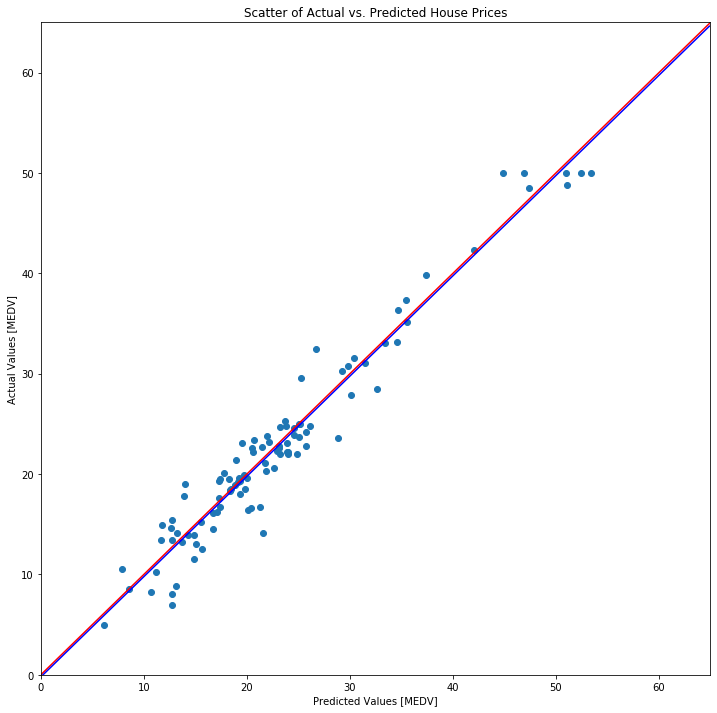

101/101 [==============================] - 0s 87us/sample - loss: 5.7322 - mean_squared_error: 5.7322 - mean_absolute_error: 1.8306
The r-squared value for this evaluation is:  0.945
The slope of the line in this evaluation is:  0.999
The y-intercept in this evaluation is;  -0.213
Loss:  5.732189348428556
Mean squared error:  5.732189
Mean absolute error:  1.830645


In [32]:
# define a fucntion to create the scatterplots

def eval_plot(test_data_inputs, test_data_outputs, model):

    # predict using the test data
    test_predictions = model.predict(test_data_inputs)

    # Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
    plt.rcParams['figure.figsize'] = [12, 12]

    # calculate the the linear regression stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(test_predictions.T, test_data_outputs)

    # title
    plt.title("Scatter of Actual vs. Predicted House Prices")

    # set the x and y limits
    lims = [0, 65]
    plt.xlim(lims)
    plt.ylim(lims)

    # label the axes
    plt.ylabel('Actual Values [MEDV]')
    plt.xlabel('Predicted Values [MEDV]')

    # plot a red line (y=x)
    _ = plt.plot(lims, lims, c='red')

    # plot the scatter
    plt.scatter(test_predictions.T, test_targets)

    # plot best-fit line
    x = np.arange(0,65,0.1)
    y = slope * x + intercept

    plt.plot(x,y,'b-')

    plt.show()
    loss, mse, mae = model.evaluate(test_data_inputs, test_data_outputs)
    # print the linear regression stats
    print("The r-squared value for this evaluation is: ", round(r_value*r_value,3))
    print("The slope of the line in this evaluation is: ", round(slope,3))
    print("The y-intercept in this evaluation is; ",round(intercept,3))
    print("Loss: ", loss)
    print("Mean squared error: ", mse)
    print("Mean absolute error: ", mae)
    
 

# call the function
eval_plot(normed_test_data, test_targets, model_1)


To evaluate this model we need to consider both the graph and the linear regression stats. If the model made perfect predictions all of the points would lie on the blue line, and the blue line would lie exactly on the red line. There seems to be a good correlation between the predicted values and the true values as the $r^2$ value for the evaluation model us high at nearly 0.95. However the best fit line for the points is not $y = x$, and the mean absolute error is less than 2,000 dollars. This is quite good at predicting house prices on the test set, however there is some scope to try and improve the model. In the following section we will carry out the following:

1. Experiment with some different activation functions.
1. Experiment with some different optimizers. 
1. Change the shape of the model by adding more hidden layers.
1. Change the shape of the model by modifying the number of neurons in each layer.
1. Build a new model using only a subset of the data (In Section 1 were determined that LSTAT and RM were highly correlated to the MEDV)

### Optimising the model

In this section we will look at optimising the model as descibed above. First we will look at changing just the activation functions. We will then re-evaluate to see which one gives the best results for this model.


#### Testing Activation Functions
While researching this project I came across 3 other activation functions[32] that can be investigated to see do they improve the predictions. These are:

* linear, this is a basic activation function that does not apply any transformation to the output of the neurons
* tanh, this is the hyperbolic tan function. It is similar to the sigmoid function but it returns values in the range -1 to 1
* relu, this returns 0 for negative values - otherwise it is just a linear function.

In this next step we will rebuild the model 3 times, each using a different activation function. We will train each model using the training data and test as before to see if any other activation function improves on the sigmoid function from the last section.

#### The linear activation function

In this step we will build the model as before except this time we will only use a linear activation function. First we build, compile and train the model.

In [33]:
# build the model
model_2 = build_model(64,'linear',2,train_dataset)
# compile the model define the loss function and optimiser
model_2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_2.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

The first thing to note about the linear activation function is that the loss function remained high. It came down to about 24 or 25 after 15 epochs but after 1000 epochs it was still at this level. Already it looks like this will be a poor activation function for the model. Next we test the predictor using the test data and plot the actual values against the predicted values as before.

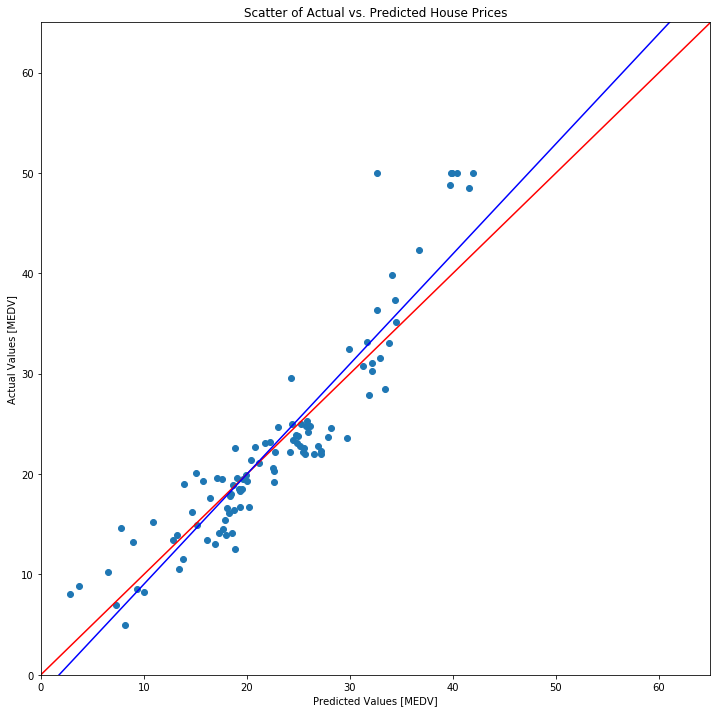

101/101 [==============================] - 0s 139us/sample - loss: 16.2324 - mean_squared_error: 16.2324 - mean_absolute_error: 2.9841
The r-squared value for this evaluation is:  0.85
The slope of the line in this evaluation is:  1.097
The y-intercept in this evaluation is;  -1.95
Loss:  16.23243448993947
Mean squared error:  16.232435
Mean absolute error:  2.9840539


In [34]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets, model_2)

Note that the $r^2$ value is lower that for the sigmoid function - the correlation between the predicted values and actual values is not as good. We can also see that the points are quite scattered and that the mean absolute error is over 3000 dollars, it is not performing as well as the sigmoid function. Next we will consider the tanh function.

#### The hyperbolic tan activation function

As before we will create, compile and build the model, this time using the tanh activation function.

In [35]:
# build the model
model_3 = build_model(64,'tanh',2,train_dataset)
# compile the model define the loss function and optimiser
model_3.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_3.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

The loss was quite low with this activation function - it was down under 1 after approx 300 epochs and continued to drop after that. Again we'll predict the values using the test data and plot these versus the actual values

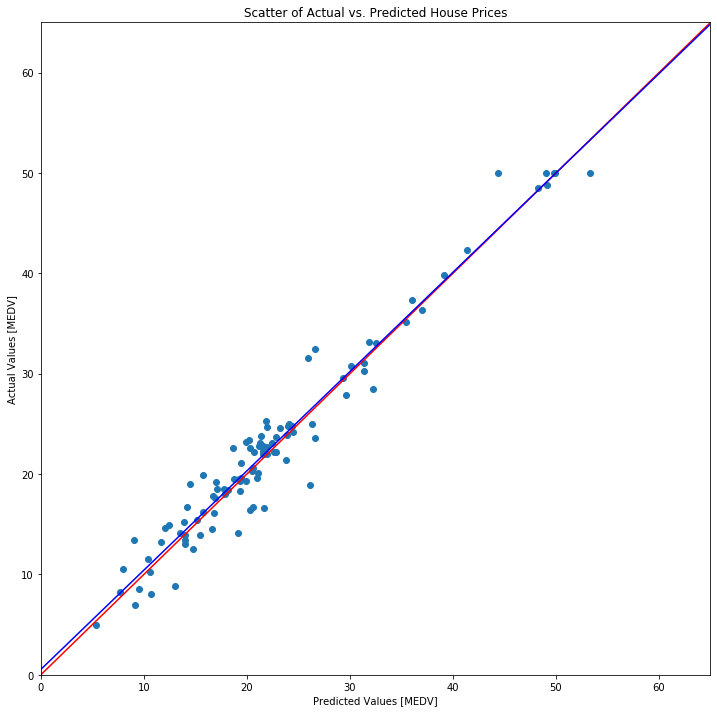

101/101 [==============================] - 0s 205us/sample - loss: 5.1304 - mean_squared_error: 5.1304 - mean_absolute_error: 1.6385
The r-squared value for this evaluation is:  0.951
The slope of the line in this evaluation is:  0.989
The y-intercept in this evaluation is;  0.532
Loss:  5.13038435784897
Mean squared error:  5.1303844
Mean absolute error:  1.6385093


In [36]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets, model_3)

This has performed as well as the sigmoid activation function, with a similar $r^2$ value and similar slope and intercept. This is to be expected as the tanh function and sigmoid function are actually quite similar. The tanh function might prove useful on this dataset as the loss was lower after fewer epochs - this could save some training time. The mean absolute error was quite low for this function so it seems to be predicting quite well. Finally, we can test the relu activation function.

#### The rectified linear unit activation function

Finally we'll trial the rectified linear unit function. We'll follow the same procedure as before.

In [37]:
# build the model
model_4 = build_model(64,'relu',2,train_dataset)
# compile the model define the loss function and optimiser
model_4.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_4.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

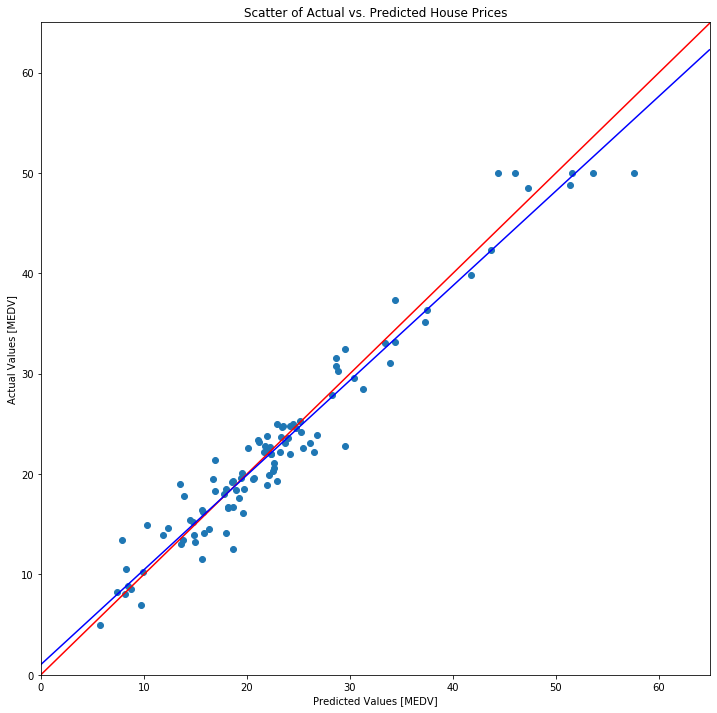

101/101 [==============================] - 0s 83us/sample - loss: 6.1029 - mean_squared_error: 6.1029 - mean_absolute_error: 1.8992
The r-squared value for this evaluation is:  0.945
The slope of the line in this evaluation is:  0.944
The y-intercept in this evaluation is;  1.019
Loss:  6.102868885096937
Mean squared error:  6.102869
Mean absolute error:  1.8992475


In [38]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets, model_4)

The is a good correlation between the predicted and actual values using this activation function, however the best fit lit is not close to $y = x$. It seems to be better at predicting in the range 20-40,000 dollars. It is not as good outside this range. The mean absolute error is not quite as low as for the sigmoid or tanh functions.

#### Activation functions summary

The sigmoid and tanh activation functions provided better predictions that the linear and rectified linear unit function on this test data set. The tanh function was particularly good at reducing the loss function with less epochs.


#### Testing Different Optimisers

In this section we will use the sigmoid activation function from the first model, but we will experiment with some different optimisers. In the original model we used the 'adam' optimiser. There are 2 other that I would like to test:
1. Stochastic Gradient Descent, which was introduced to us during the course lectures
1. RMSprop, which I came across while working though a tensorflow tutorial

As with the activation functions we will rebuild and compile the model using these and determine if these improve the predictions.

#### Stochastic Gradient Descent (SGD)

First we re-build the model using the sigmoid activation function and 'SGD' optimiser. Then we retrain it with the training dataset.

In [39]:
# build the model
model_5 = build_model(64,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_5.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mse','mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_5.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

The optimiser did get the loss function to come down, but it was quite slow and took numerous epochs to get it close to 1. Next we will plot and evaluate.

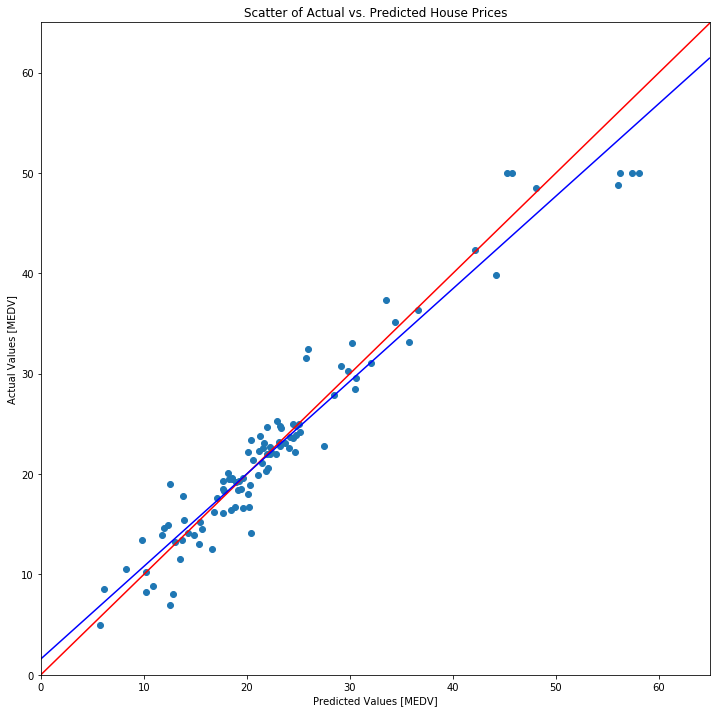

101/101 [==============================] - 0s 167us/sample - loss: 7.4818 - mean_squared_error: 7.4818 - mean_absolute_error: 1.9782
The r-squared value for this evaluation is:  0.935
The slope of the line in this evaluation is:  0.922
The y-intercept in this evaluation is;  1.576
Loss:  7.481827282669521
Mean squared error:  7.4818277
Mean absolute error:  1.9781991


In [40]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets, model_5)

The $r^2$ for the correlation is not as good as for the adam optimiser. Also the points are much more scatter at the extremes. The mean absolute error is nearly 3 using this optimiser. For this reason I would suggest that the adam has performed better than the sgd optimser.

#### RMSProp optimiser

Finally we will rebuild and train the model using the RMSProp optimiser.

In [41]:
# build the model
model_6 = build_model(64,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_6.compile(optimizer='RMSProp', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_6.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Then we evaluate the impact of the RMSProp optimiser on the predictions.

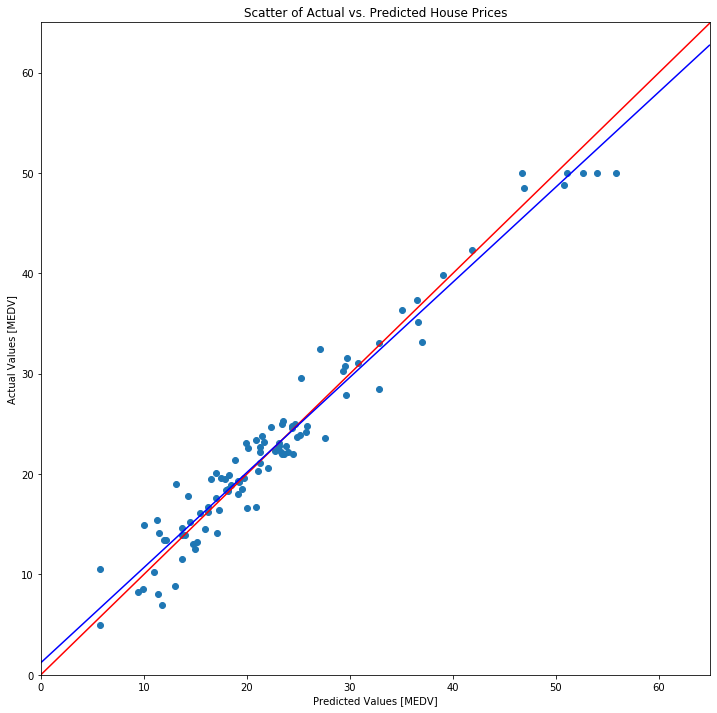

101/101 [==============================] - 0s 216us/sample - loss: 5.3068 - mean_squared_error: 5.3068 - mean_absolute_error: 1.7901
The r-squared value for this evaluation is:  0.951
The slope of the line in this evaluation is:  0.948
The y-intercept in this evaluation is;  1.2
Loss:  5.3067934206216645
Mean squared error:  5.3067927
Mean absolute error:  1.7901006


In [42]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_6)

The $r^2$ value is good, and the line is relatively good, however the model seems to be poor at predicting at for the higher values. The mean absolute error is less  not as good as when the adam optimiser was used.

#### Summary of optimisers

Of the 3 optimisers tested - the adam optimiser seems to work best with this dataset.

#### Adding More Layers to the Model

Until this point, all the shape of the model was the same - 64 neurons per hidden layer, and 2 hidden layers, in this section we'll add some more layers and evaluate the impact of that.

#### Modelling 3 Hidden Layers
First we will add 1 hidden layer, again we will have 64 neurons per layer, the sigmoid activation function and the adam optimiser.

In [43]:
# build the model
model_7 = build_model(64,'sigmoid',3,train_dataset)
# compile the model define the loss function and optimiser
model_7.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_7.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

And then we evaluate:

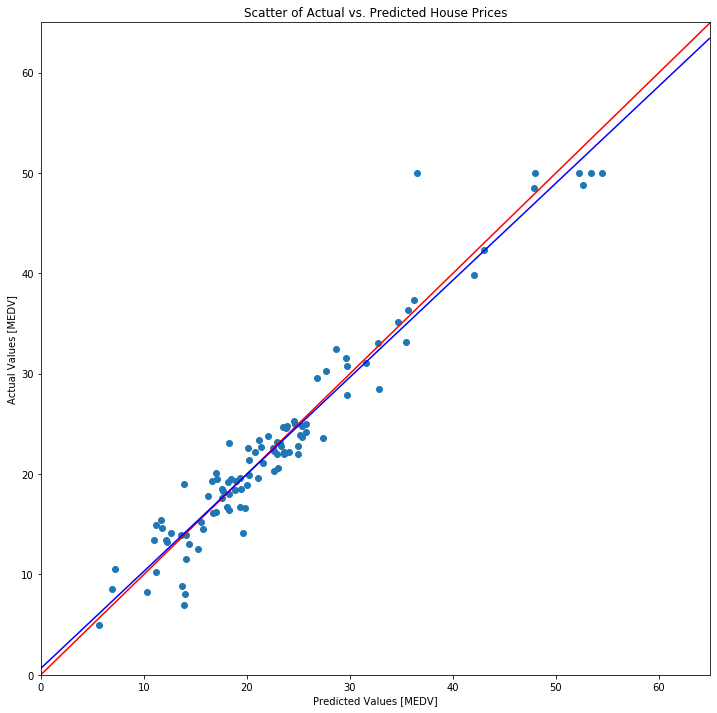

101/101 [==============================] - 0s 104us/sample - loss: 7.0507 - mean_squared_error: 7.0507 - mean_absolute_error: 1.9235
The r-squared value for this evaluation is:  0.933
The slope of the line in this evaluation is:  0.967
The y-intercept in this evaluation is;  0.64
Loss:  7.050685202721322
Mean squared error:  7.050685
Mean absolute error:  1.9234548


In [44]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_7)

The $r^2$ value for this model is good, but the mean absolute error is not as good as for 2 hidden layers.

#### Modelling 5 Hidden Layers
Adding one extra layer has not made a significant change to the performance of the model, lets try to add some more! In the next model we'll have 5 hidden layers

In [45]:
# build the model
model_8 = build_model(64,'sigmoid',5,train_dataset)
# compile the model define the loss function and optimiser
model_8.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_8.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

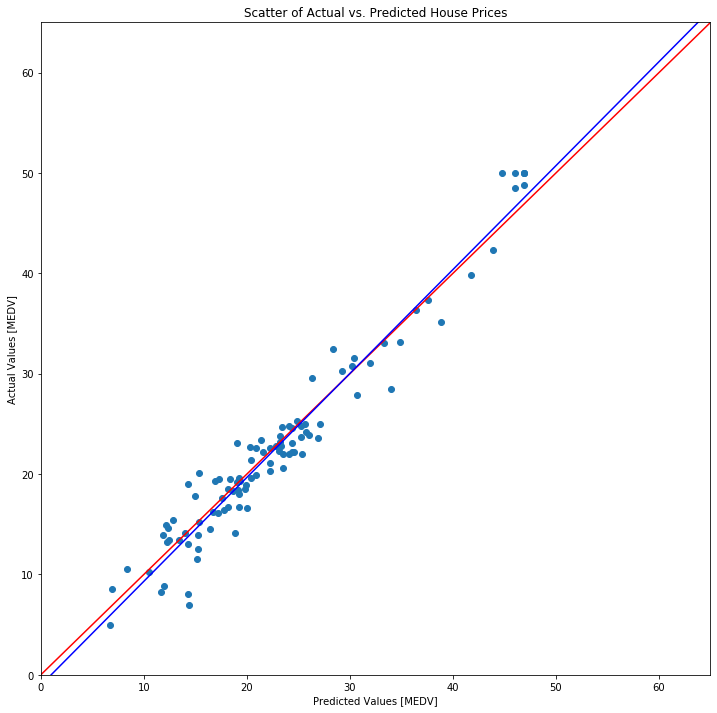

101/101 [==============================] - 0s 285us/sample - loss: 5.6618 - mean_squared_error: 5.6618 - mean_absolute_error: 1.8625
The r-squared value for this evaluation is:  0.947
The slope of the line in this evaluation is:  1.035
The y-intercept in this evaluation is;  -1.04
Loss:  5.661820421124449
Mean squared error:  5.6618204
Mean absolute error:  1.8625485


In [46]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_8)

That seems to have improved the model - but it's not as accurate for lower values - note the scatter of the data points for values below 20k. The mean absolute error is not too bad for this model which would hint that it is making reasonable predictions. We will now test the model with 10 hidden layers to evaluate the impact.

#### Modelling 10 Hidden Layers

In [47]:
# build the model
model_9 = build_model(64,'sigmoid',10,train_dataset)
# compile the model define the loss function and optimiser
model_9.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_9.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

And then evaluate:

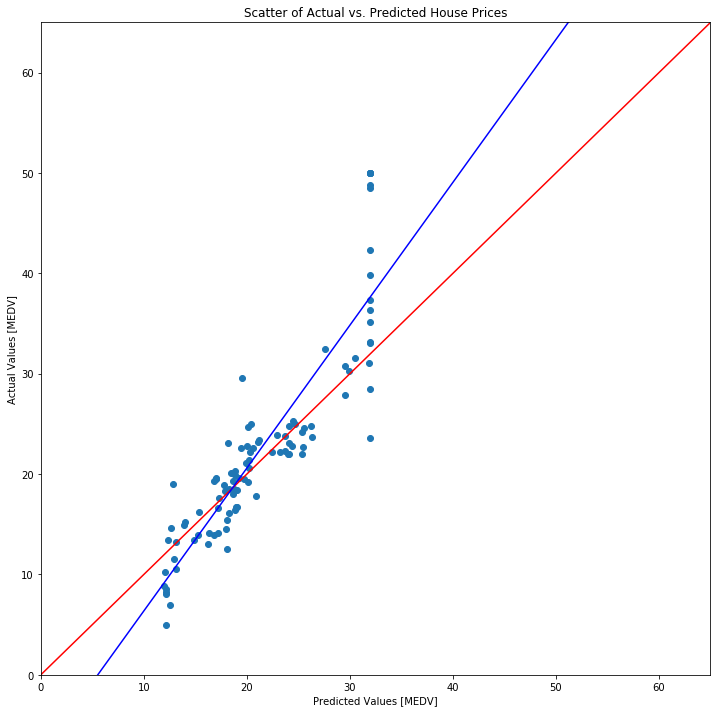

101/101 [==============================] - 0s 137us/sample - loss: 30.8592 - mean_squared_error: 30.8592 - mean_absolute_error: 3.4287
The r-squared value for this evaluation is:  0.786
The slope of the line in this evaluation is:  1.423
The y-intercept in this evaluation is;  -7.87
Loss:  30.859173066545242
Mean squared error:  30.859173
Mean absolute error:  3.4287367


In [48]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_9)

Adding more layers has not improved the model. The mean absolute error is over 3 and the $r^2$ value for the correlation between the actual and predicted values is poor. Next, we can look at changing the number of neurons per layer. So far we have only considered 64 neurons per layer. In this section we will test 10 and 100.

#### Modelling 10 Neurons per Layer

In this section we will build and evaluate a model with 10 neurons per layer, we will used 2 hidden layers, and the sigmoid function and the adam optimser.

In [49]:
# build the model
model_10 = build_model(10,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_10.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_10.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Then evaluate:

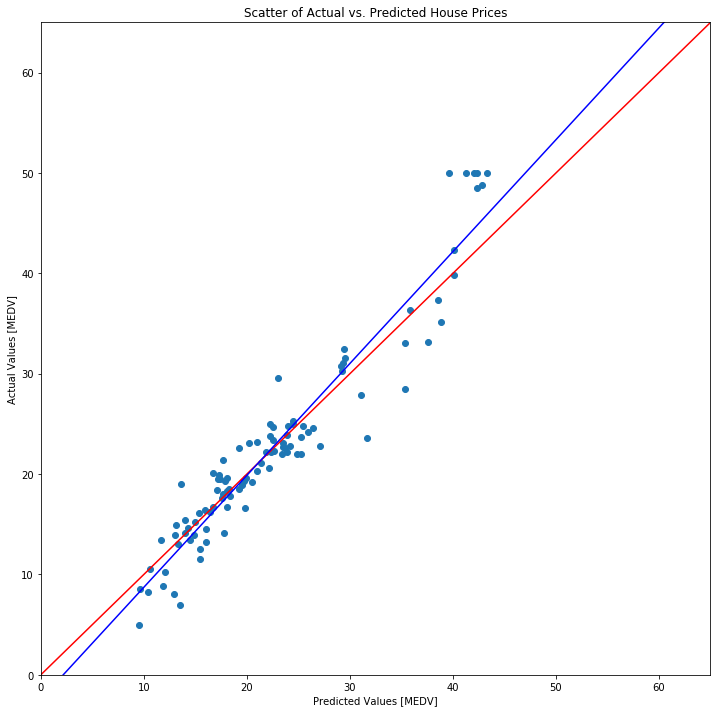

101/101 [==============================] - 0s 139us/sample - loss: 10.0396 - mean_squared_error: 10.0396 - mean_absolute_error: 2.2692
The r-squared value for this evaluation is:  0.913
The slope of the line in this evaluation is:  1.115
The y-intercept in this evaluation is;  -2.426
Loss:  10.039568948273612
Mean squared error:  10.039569
Mean absolute error:  2.2692115


In [50]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_10)

Using 10 neurons per layer has not improved the model. The $r^2$ is just over 90 and the mean absolute error is over 2. Next we will try 100.

### Modelling 100 Neurons per Layer

In [51]:
# build the model
model_11 = build_model(100,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_11.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_11.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Then evaluate:

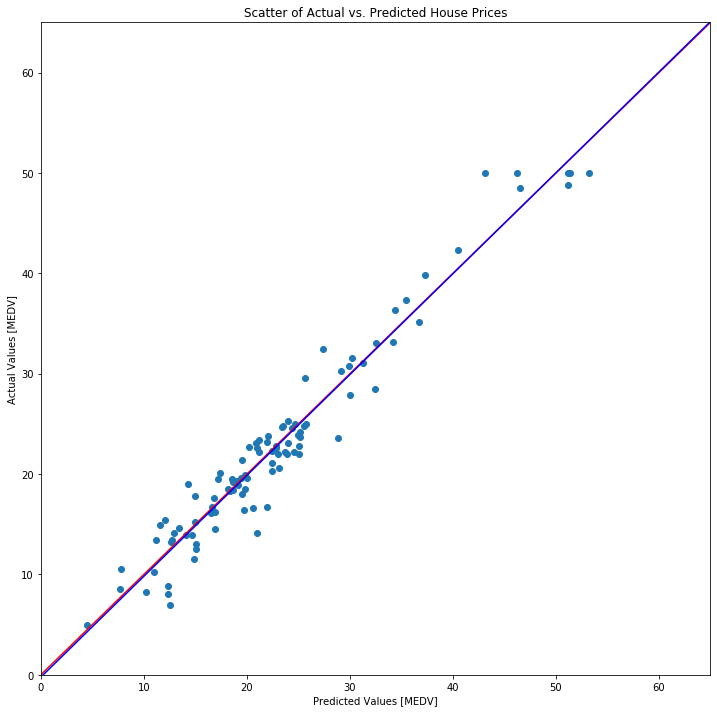

101/101 [==============================] - 0s 114us/sample - loss: 5.5713 - mean_squared_error: 5.5713 - mean_absolute_error: 1.8265
The r-squared value for this evaluation is:  0.946
The slope of the line in this evaluation is:  1.005
The y-intercept in this evaluation is;  -0.236
Loss:  5.5712847756867365
Mean squared error:  5.571285
Mean absolute error:  1.8264797


In [52]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_11)

So adding more neurons has not made a significant difference to the model. Overall, the 2 things which seem to have had the biggest impact on the performance was the number of hidden layers, and using the hyperbolic tan activation function. The next step is to combine this to see if it makes for a good model.

#### Optimised Model using the entire dataset

From the experimentation I have learned the following for this dataset:
* tanh activation function performs best
* 10 hiddens layers seems to be a goods fit
* 64 neurons per layer seems about right
* the 'adam' optimiser works best

Pulling this all together we can see does it gives us a better model:

In [53]:
# build the model
model_12 = build_model(64,'tanh',10,train_dataset)
# compile the model define the loss function and optimiser
model_12.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_12.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Then evaluate:

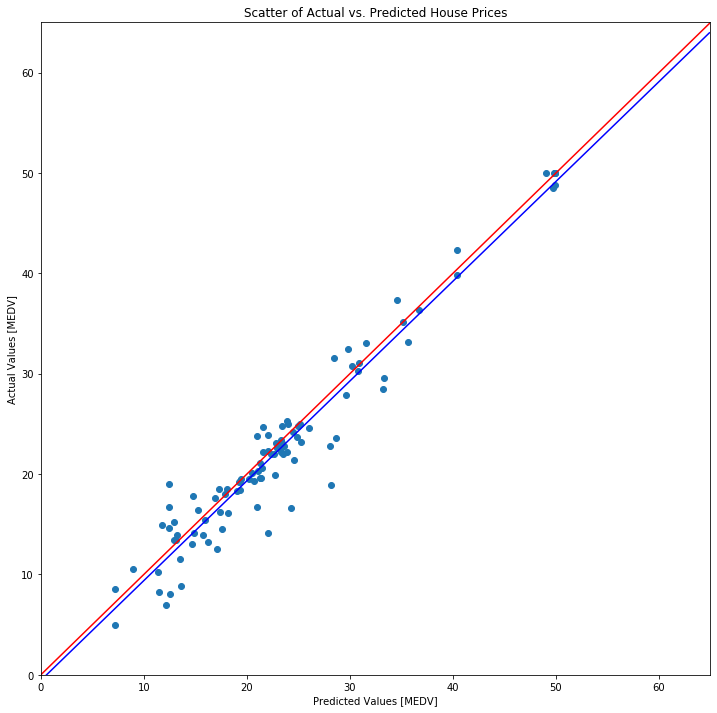

101/101 [==============================] - 0s 130us/sample - loss: 6.6474 - mean_squared_error: 6.6474 - mean_absolute_error: 1.8077
The r-squared value for this evaluation is:  0.94
The slope of the line in this evaluation is:  0.994
The y-intercept in this evaluation is;  -0.555
Loss:  6.647449493408203
Mean squared error:  6.6474495
Mean absolute error:  1.8077425


In [54]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_12)

The approach I took to tuning this model was to isolate the different aspects of the model and try to find which one works best. I then tried to pull all the best options for each feature together to see if this provided the best model overall. I wasn't surprised to find that this didn't give me the best solution! Training and tuning neural networks is tricky business and just because a particualar activation function works well for a particular network shape - this is not to say that it will perform best once the a different network shape is chosen.

Overall the best model I came across was model 3, where I used the tanh function with 2 hidden layers, 64 neurons per layer and the adam optimiser. 

### 4.4 Modifying the Dataset to improve the model

Until now, all of the models created have used the entire dataset for training. It might be possible to improve the performance of the model by using only some of the features. In the section 1 we looked at the relationships between the data and determined that the MEDV was correlated to both the LSTAT and RM features. In this section I'm going to try and train the model using only these features. In section 1 I created a new dataframe 'medv_df'. 

In [55]:
# select 80% of the dataset at random
train_dataset = medv_df.sample(frac=0.8,random_state=0)
# create a test dataset by removing the training data from it
test_dataset = medv_df.drop(train_dataset.index)

# check that the data is split correctly
print("There are %d data points in the entire set" % df["LSTAT"].count())
print("There are %d data points in the training set" % train_dataset["LSTAT"].count())
print("There are %d data points in the test set" % test_dataset["LSTAT"].count())

# pop the median values to new datasets
train_targets = train_dataset.pop('MEDV')
test_targets = test_dataset.pop('MEDV')

# create the training stats for the normalisation 
# this allows up to find means and standard deviattions of each feature
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# normalise the 2 input datasets
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

There are 506 data points in the entire set
There are 405 data points in the training set
There are 101 data points in the test set


In [58]:
# build the model
model_13 = build_model(64,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_13.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_13.fit(normed_train_data, train_targets,epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

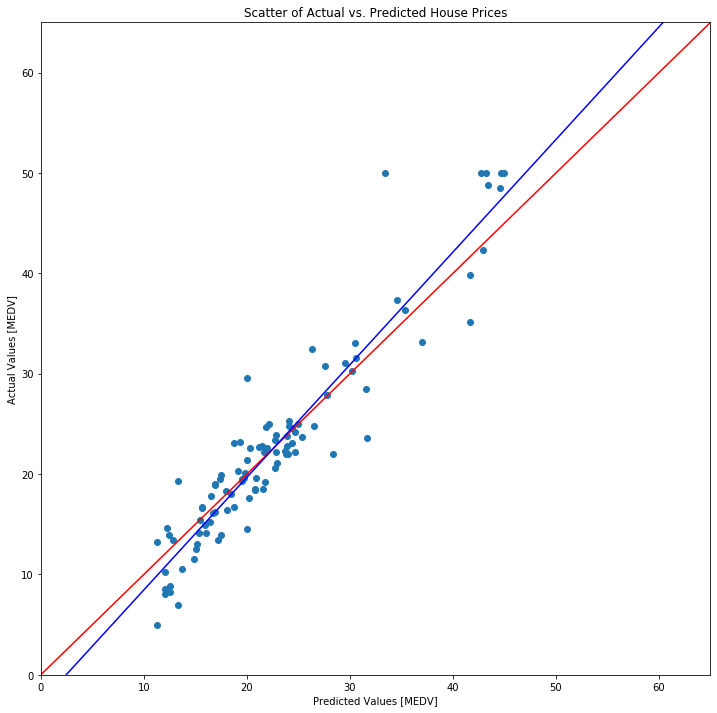

101/101 [==============================] - 0s 196us/sample - loss: 12.4685 - mean_squared_error: 12.4685 - mean_absolute_error: 2.5607
The r-squared value for this evaluation is:  0.89
The slope of the line in this evaluation is:  1.122
The y-intercept in this evaluation is;  -2.762
Loss:  12.46853241117874
Mean squared error:  12.4685335
Mean absolute error:  2.5606935


In [59]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_13)

Even though we know that LSTAT and RM are well correlated with MEDV, taking this as a subset of the main dataframe has not provided a better model. Note that I have tried several activation functions, optimisers and netwrok shapes but I have found that using the entire dataset has provided better predictions that just using the highly correlated variables. If we are to explore this concept further it might be worth 'whitening' the entire dataset to remove these correlations to see if that provides us with a better predictor.

First we must re-split out the dataset and normalise them

In [61]:
# select 80% of the dataset at random
train_dataset = df.sample(frac=0.8,random_state=0)
# create a test dataset by removing the training data from it
test_dataset = df.drop(train_dataset.index)

# check that the data is split correctly
print("There are %d data points in the entire set" % df["LSTAT"].count())
print("There are %d data points in the training set" % train_dataset["LSTAT"].count())
print("There are %d data points in the test set" % test_dataset["LSTAT"].count())

# pop the median values to new datasets
train_targets = train_dataset.pop('MEDV')
test_targets = test_dataset.pop('MEDV')

# create the training stats for the normalisation 
# this allows up to find means and standard deviattions of each feature
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# normalise the 2 input datasets
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

There are 506 data points in the entire set
There are 405 data points in the training set
There are 101 data points in the test set


## 5. Conclusions

## References

1. [1] Project Jupyter. Project Jupyter Home. https://www.jupyter.org/
1. [2] University of Toronto. Boston Dataset. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
1. [3] Python Software Foundation. Welcome to python.org. https://www.python.org/
1. [4] SciPy developers. The scipy python package. https://www.scipy.org/
1. [5] Keras Team. Keras: The python deep learning library. https://keras.io/
1. [6] Hedonic Housing Prices and the Demand for Clean Air. Harrison and Rubinfield. 1978
1. [7] sklearn developers. The sklearn python package. https://scikit-learn.org/stable/.
1. [8] sklearn developers. Dataset loading. https://scikit-learn.org/stable/datasets/index.html
1. [9] Wikipedia. Pearson Correlation Coefficient. https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
1. [10] Wikipedia. Ohm's Law. https://en.wikipedia.org/wiki/Ohm%27s_law
1. [11] www.towardsdatascience.com. Predicting Boston House Prices with Regression. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d  
1. [12] www.towardsdatascience.com. Linear Regression on Boston Housing Dataset. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155  
1. [13] Northwestern Unversity. Boston Home Values, across U.S. Census Tracts. https://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/Boston.htm  
1. [14] SciPy Developers. A simple regression analysis on the Boston housing data. https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html  
1. [15] Statistics How To. What is Inferential Statistics. https://www.statisticshowto.datasciencecentral.com/inferential-statistics/
1. [16] Deborah J. Rumsey. Statistics for Dummies. Chapter 12 - Leaving Room for a Margin of Error. 
1. [17] www.stattrek.com. Hypothesis Test: Difference Between Means. https://stattrek.com/hypothesis-test/difference-in-means.aspx
1. [18] www.real-statistics.com. When t-test assumptions are violated. http://www.real-statistics.com/students-t-distribution/problems-data-t-tests/
1. [19] www.real-statistics.com. Non-parametric tests.http://www.real-statistics.com/non-parametric-tests/
1. [20] www.real-statistics.com. Wilcoxon Rank Sum test.http://www.real-statistics.com/non-parametric-tests/wilcoxon-rank-sum-test/
1. [21] SciPy developers. scipy.stats.ranksums. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html
1. [22] Tensorflow Developers. Basic regression: Predict fuel efficiency. https://www.tensorflow.org/tutorials/keras/regression
1. [23] www.geeksforgeeks.org. Introduction to Machine Learning. https://www.geeksforgeeks.org/introduction-machine-learning/
1. [24] Anmol Behl. An introduction to Machine Learning. https://becominghuman.ai/an-introduction-to-machine-learning-33a1b5d3a560
1. [25] Lisa Tagliaferri. An introduction to Machine Learning. https://www.digitalocean.com/community/tutorials/an-introduction-to-machine-learning
1. [26] David Fumo. A Gentle Introduction to Neural Networks - Part 1.https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc
1. [27] Role of Bias in Neural Networks. https://intellipaat.com/community/253/role-of-bias-in-neural-networks
1. [28] Anish Singh Walia. Activation functions and it’s types-Which is better? .https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f
1. [29] www.wikipedia.org. Sigmoid function. https://en.wikipedia.org/wiki/Sigmoid_function
1. [30] Keras. Optimizers - Keras. https://keras.io/optimizers/
1. [31] Wikipedia. Mean Squared Error. https://en.wikipedia.org/wiki/Mean_squared_error
1. [32] Keras. Usage of activations. https://keras.io/activations/

## End